In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate

from ipynb.fs.full.Peaks import slicer


In [2]:
#Loading resistance data - Test #2 - Test #6
NE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test2_NE1.csv")
NE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test3_NE2.csv")
NE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#4 NE3.csv.csv")
NE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#5 NE4.csv.csv")
NE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#6 NE5.csv.csv")

#SMU-1 Time (s)
#Getting the time for the sensor data.
NE1_raw = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#2 NE1.csv")
NE2_raw = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#3 NE2.csv")
NE3_raw = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#4 NE3.csv")
NE4_raw = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#5 NE4.csv")
NE5_raw = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#6 NE5.csv")

#Loading the corresponding force data
force_NE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#2 NE1.log" , delimiter = "\t")
force_NE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#3 NE2.log" , delimiter = "\t")
force_NE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#4 NE3.log" , delimiter = "\t")
force_NE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#5 NE4.log" , delimiter = "\t")
force_NE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#6 NE5.log" , delimiter = "\t")

In [3]:
# NE1_raw["SMU-1 Time (s)"]
NE1_raw

Index  SMU-1 Time (s)  SMU-1 Voltage (V)  SMU-1 Current (A)  \
0         1        0.132876           1.000147           0.002560   
1         2        0.216962           1.000127           0.002559   
2         3        0.311288           1.000074           0.002559   
3         4        0.406359           1.000085           0.002559   
4         5        0.497879           1.000129           0.002560   
...     ...             ...                ...                ...   
6979   6980      861.045036           1.000198           0.002545   
6980   6981      861.144631           1.000211           0.002545   
6981   6982      861.225235           1.000230           0.002545   
6982   6983      861.339650           1.000195           0.002545   
6983   6984      861.437352           1.000238           0.002545   

      SMU-2 Voltage (V)  SMU-2 Current (A)  SMU-3 Voltage (V)  \
0              1.000127           0.001401           1.000028   
1              1.000149           0.001401           1.000032   
2              1.000144           0.001401           1.000036   
3              1.000125           0.001401           1.000021   
4              1.000104           0.001401           1.000033   
...                 ...                ...                ...   
6979           1.000099           0.001394           1.000033   
6980           1.000077           0.001394           1.000055   
6981           1.000114           0.001394           1.000039   
6982           1.000106           0.001394           1.000059   
6983                NaN                NaN                NaN   

      SMU-3 Current (A)  SMU-4 Voltage (V)  SMU-4 Current (A)          R1  \
0              0.002906           0.999971           0.001973  390.667385   
1              0.002905           0.999993           0.001972  390.758366   
2              0.002905           0.999961           0.001972  390.825160   
3              0.002905           0.999976           0.001972  390.792204   
4              0.002906           0.999984           0.001972  390.691171   
...                 ...                ...                ...         ...   
6979           0.002880           0.999976           0.001912  393.020481   
6980           0.002880           0.999967           0.001912  393.011193   
6981           0.002880           0.999964           0.001912  393.012259   
6982           0.002880           0.999966           0.001912  392.987048   
6983                NaN                NaN                NaN  392.969967   

               R2           R3           R4  
0     713.7496594  344.1235942  506.9252273  
1      713.736649  344.1889664   507.050717  
2     713.7950448  344.1886103  507.0919903  
3     713.8358855  344.1859371   507.088228  
4     713.7189082  344.1715451  507.0793457  
...           ...          ...          ...  
6979  717.5983235  347.1952419  522.9628276  
6980  717.5415542   347.210438  522.9797687  
6981  717.5903569  347.2058035  522.9565933  
6982  717.6029424  347.1834951  522.9238782  
6983      #DIV/0!      #DIV/0!      #DIV/0!  

[6984 rows x 14 columns]

In [4]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_NE1 = force_NE1["Time"]
x_force_NE2 = force_NE2["Time"]
x_force_NE3 = force_NE3["Time"]
x_force_NE4 = force_NE4["Time"]
x_force_NE5 = force_NE5["Time"]

#Time for sensor

#force
Load_NE1 = force_NE1["Load"]
Load_NE2 = force_NE2["Load"]
Load_NE3 = force_NE3["Load"]
Load_NE4 = force_NE4["Load"]
Load_NE5 = force_NE5["Load"]

#plt.plot(x_force_NE1,Load_NE1,color = 'green', label = 'force data NE1 test #2' )
#plt.plot(x_force_NE2,Load_NE2,color = 'blue', label = 'force data NE2 test #2' )
# plt.plot(x_force_NE3,Load_NE3,color = 'yellow', label = 'force data NE3 test #2' )
# plt.plot(x_force_NE4,Load_NE4,color = 'red', label = 'force data NE4 test #2' )
# plt.plot(x_force_NE5,Load_NE5,color = 'brown', label = 'force data NE5 test #2' )

<Figure size 3600x2160 with 0 Axes>

In [5]:
# force_NE1.iloc[200:250]

In [6]:
# force_NE1.head()

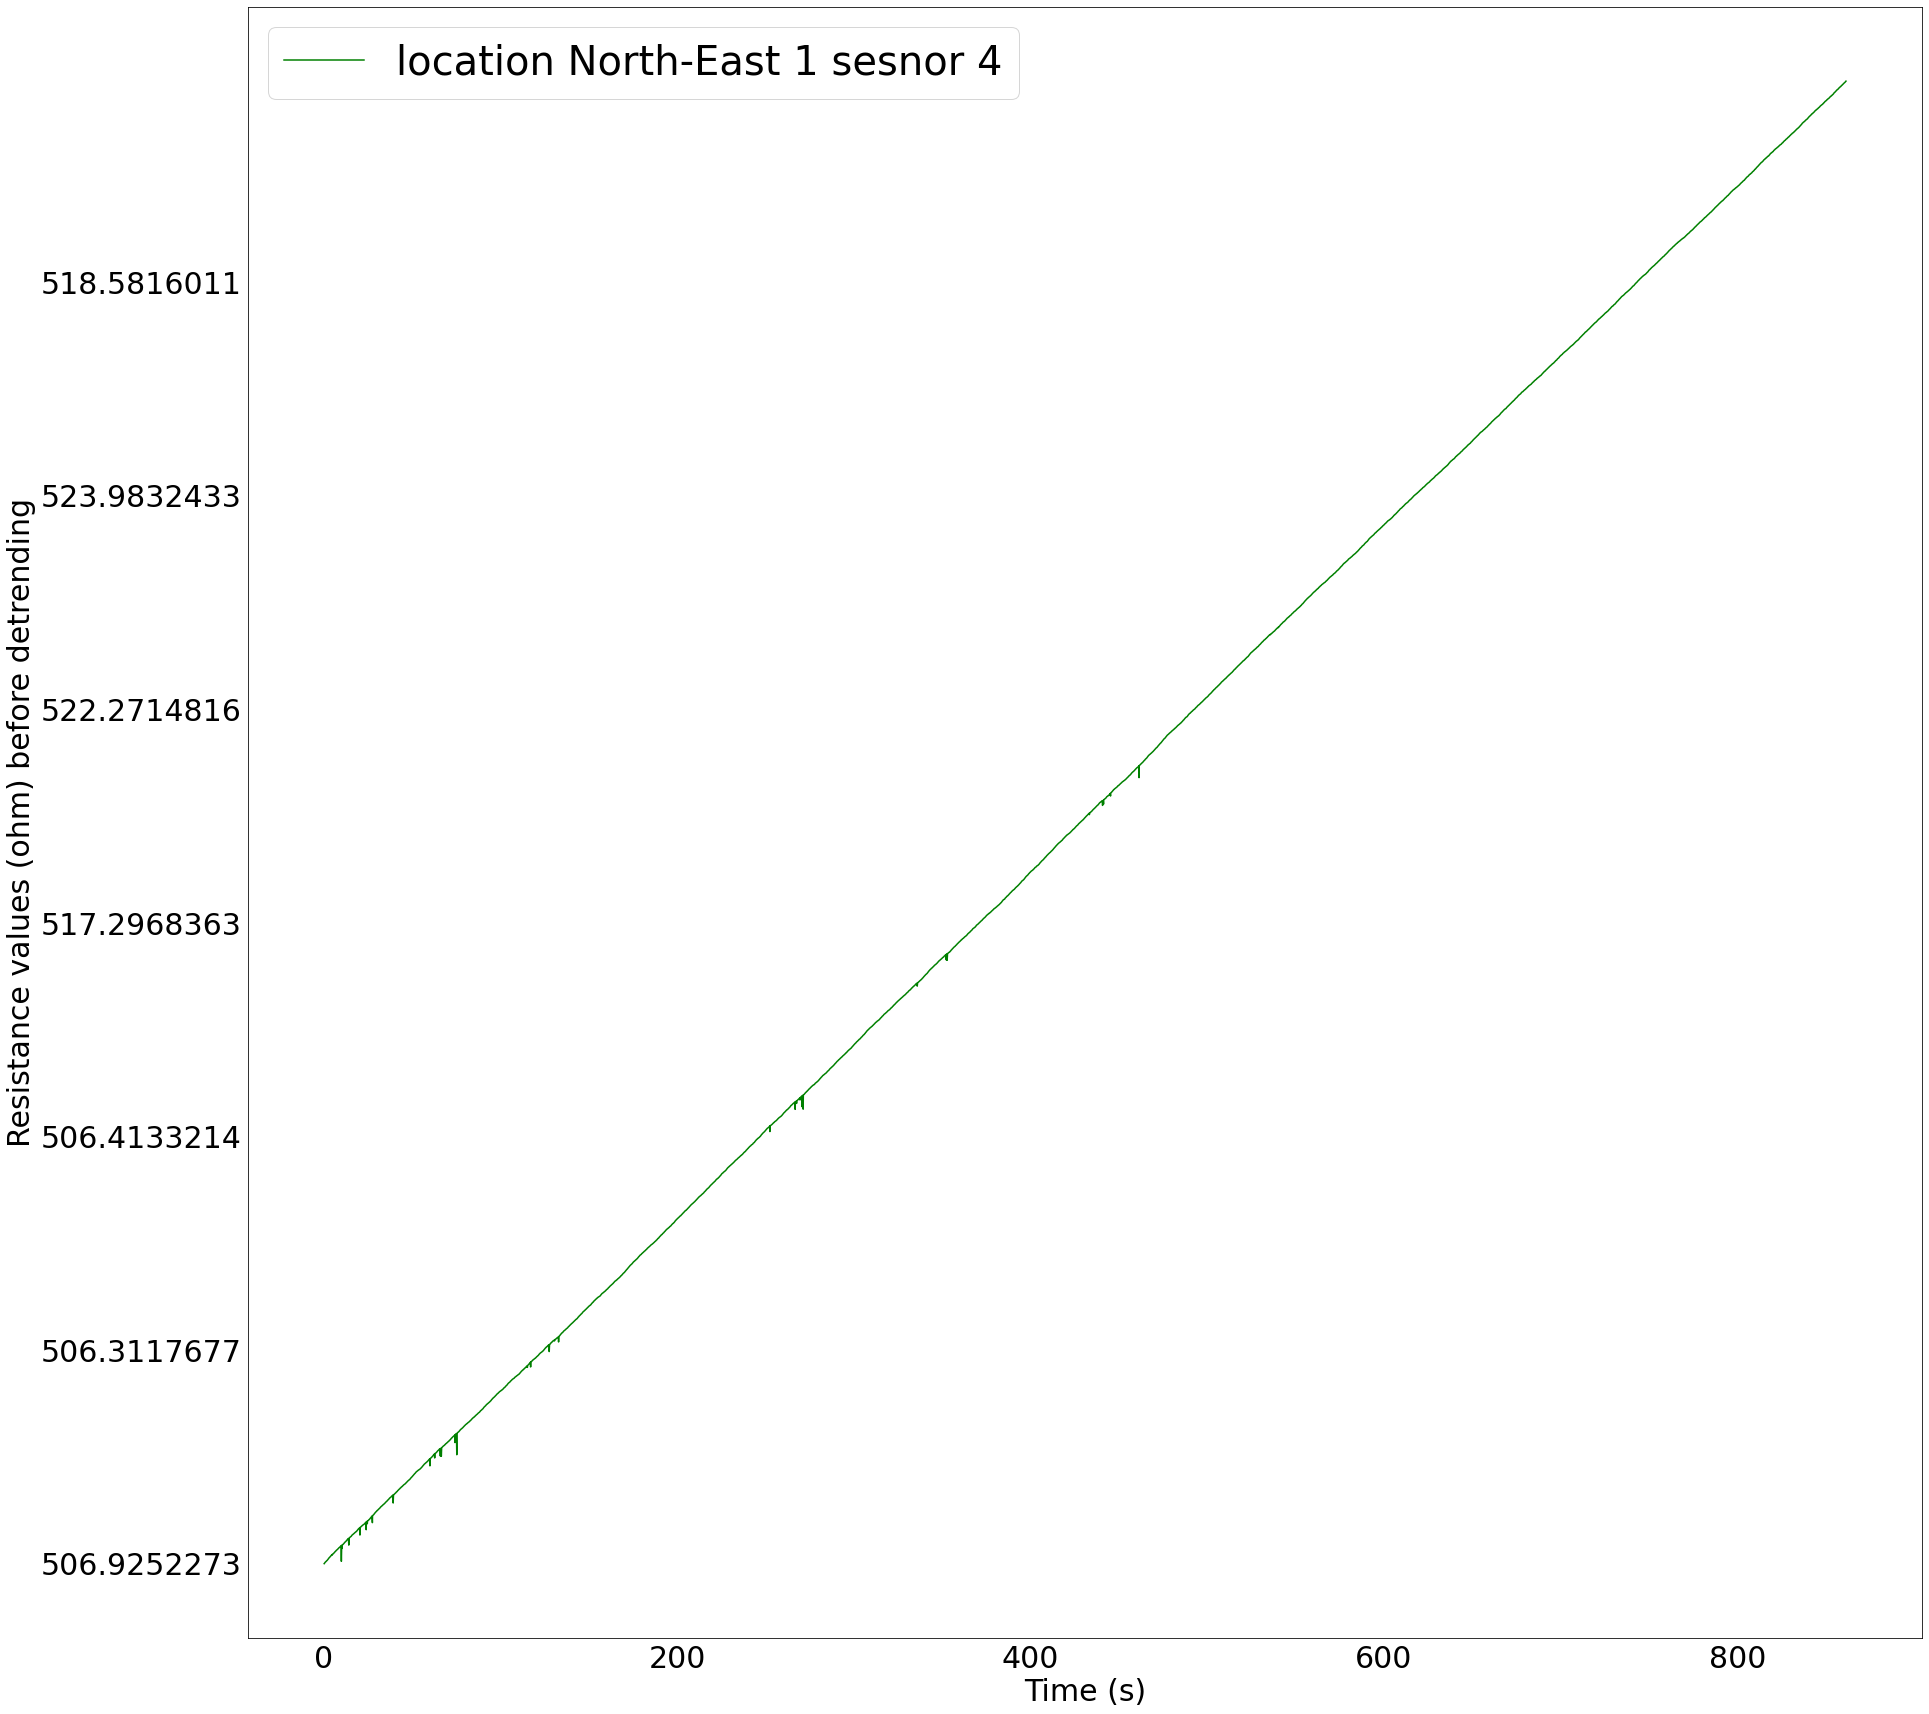

In [20]:
# NE1.head()
fig1, ax3 = plt.subplots(figsize=(30, 30))
plt.rcParams['font.size'] = 30

import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(1000)

plt.tick_params(left = False, bottom = False)
ax3.yaxis.set_major_locator(myLocator)
ax3.plot(NE1_raw["SMU-1 Time (s)"], NE1_raw["R4"], color = 'green', label = 'location North-East 1 sesnor 4')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Resistance values (ohm) before detrending')
plt.legend(fontsize=40)

273
6984


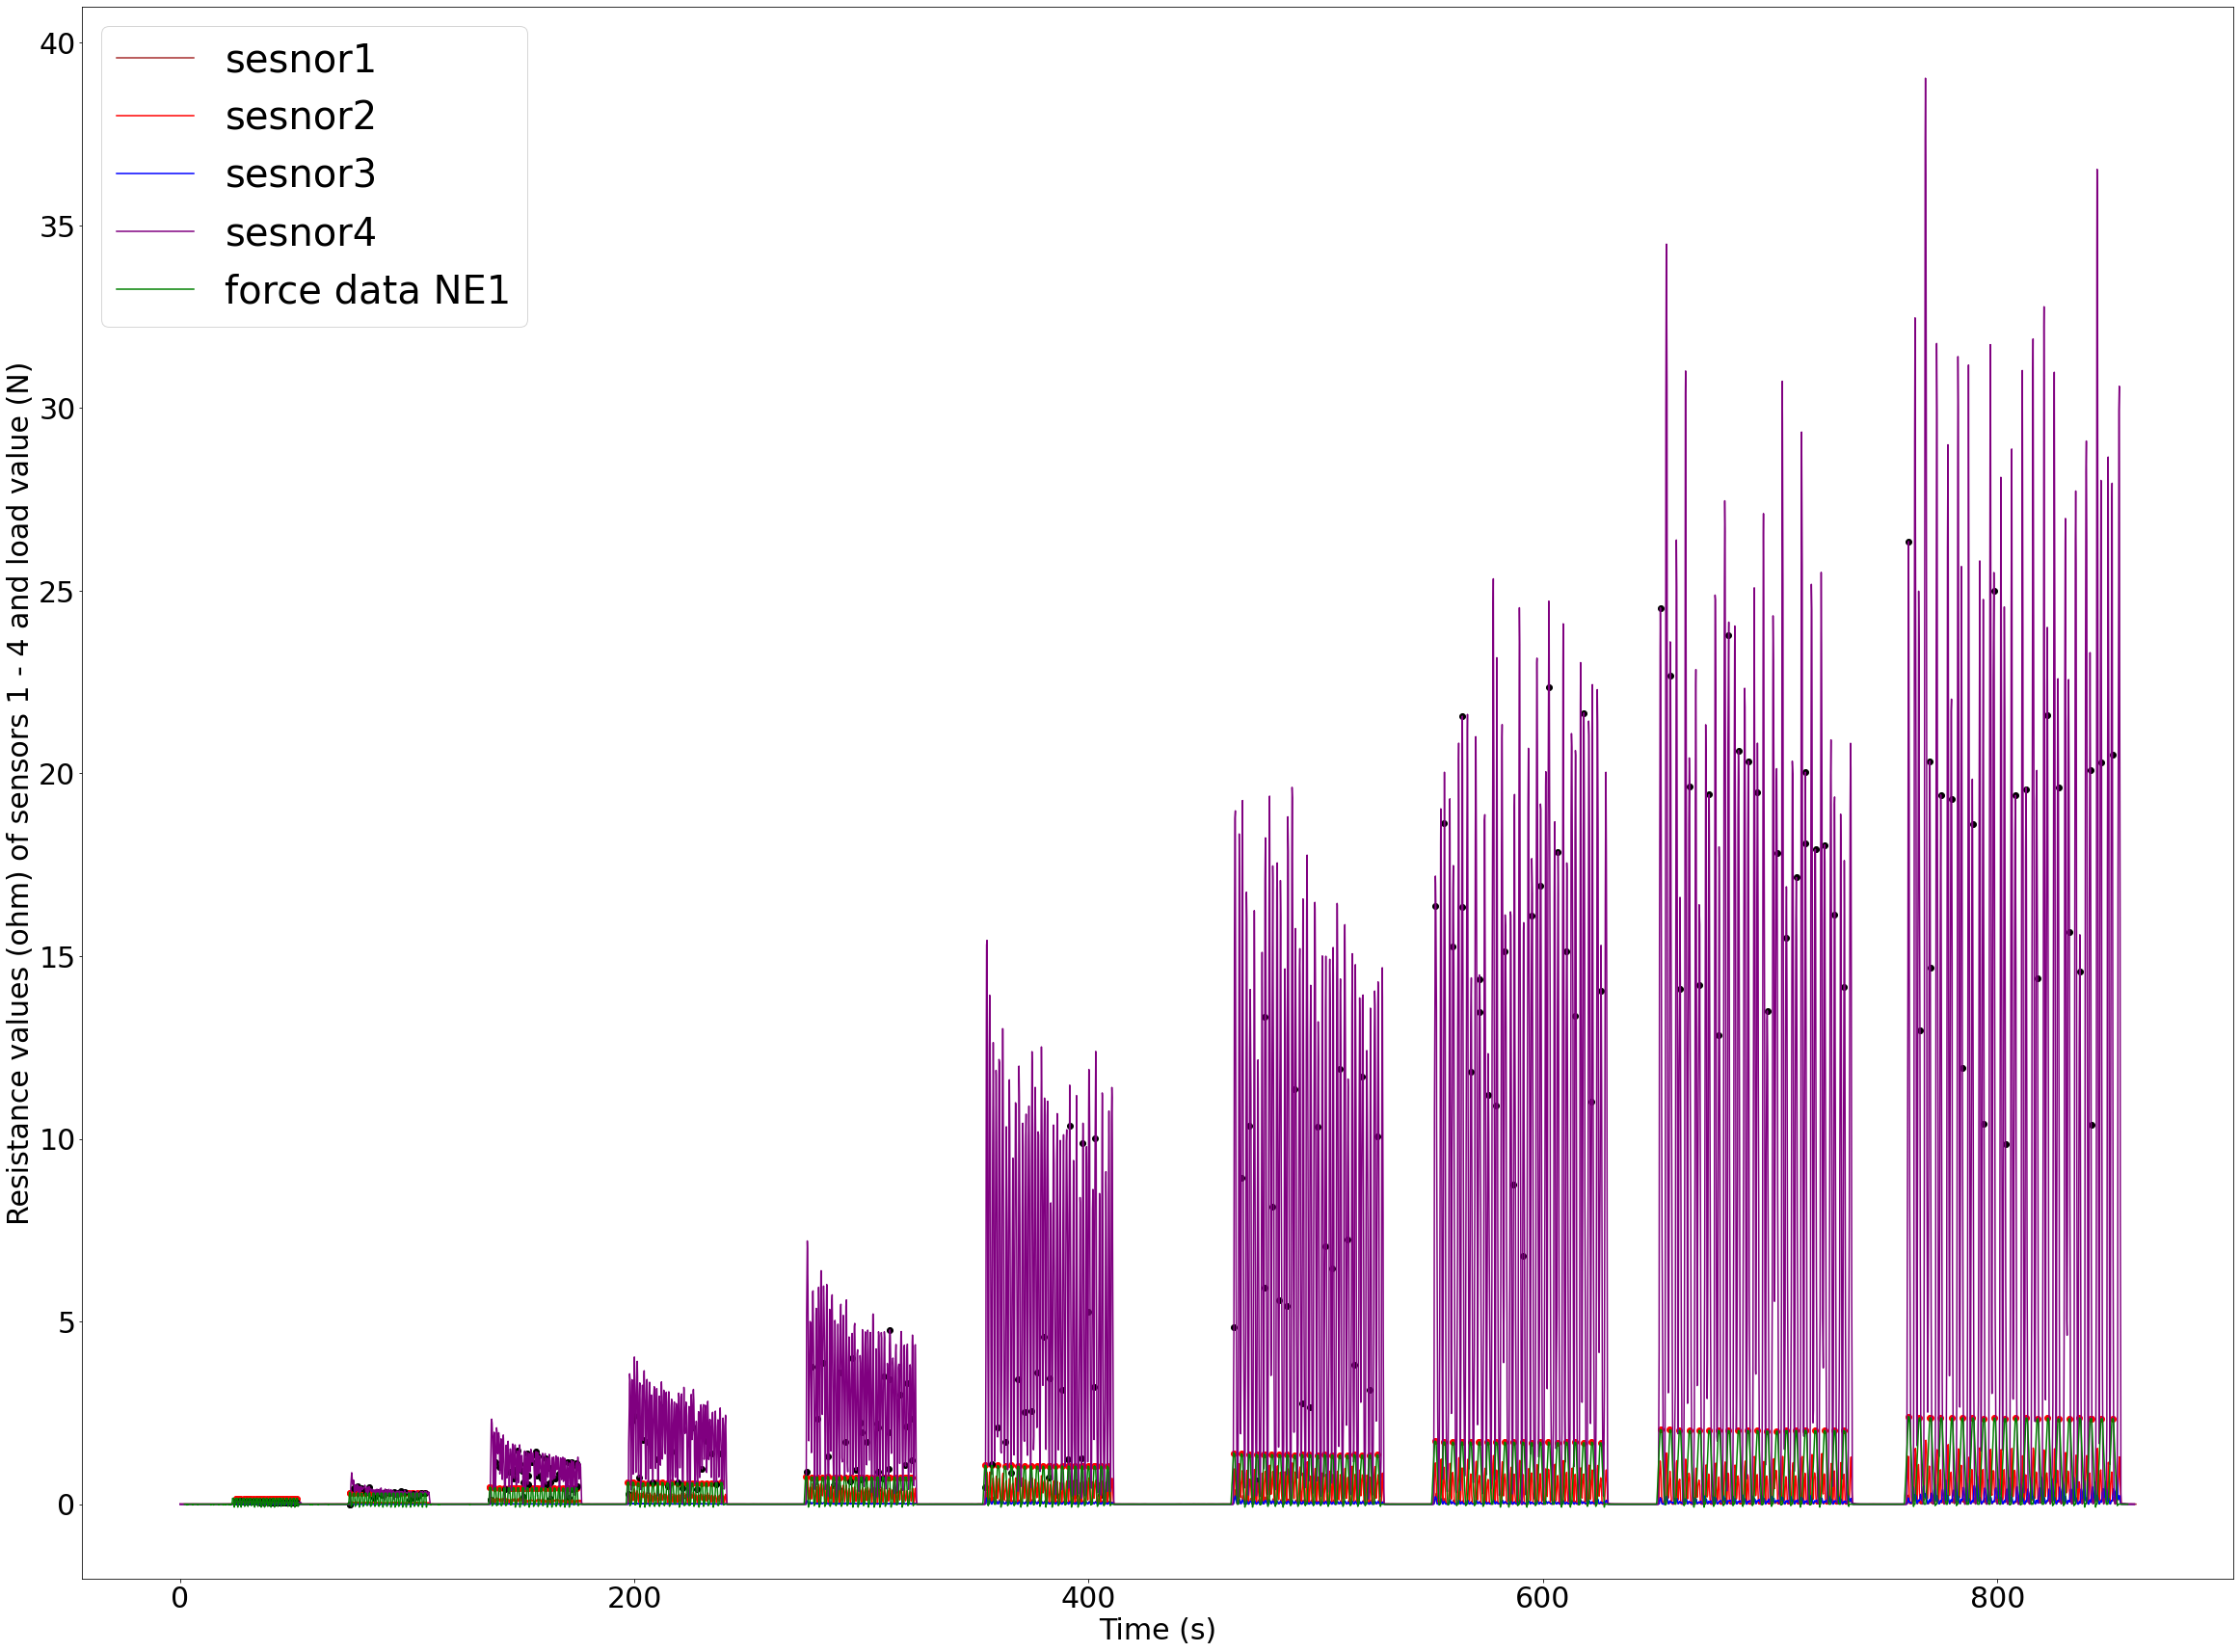

In [27]:
#visualizing the resistance data for each sensor NE 1- 5 - NE1
fig1, ax4 = plt.subplots(figsize=(40, 30))
plt.rcParams['font.size'] = 30
# plt.rcParams['font.size'] = 30
# plt.figure(figsize=(30, 30))

       
ax4.plot(NE1["Unnamed: 0"],NE1["s1_d"], color = 'brown', label = 'sesnor1')
ax4.plot(NE1["Unnamed: 0"],NE1["s2_d"], color = 'red', label = 'sesnor2')
ax4.plot(NE1["Unnamed: 0"],NE1["s3_d"], color = 'blue', label = 'sesnor3')
ax4.plot(NE1["Unnamed: 0"],NE1["s4_d"], color = 'purple', label = 'sesnor4')

ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Resistance values (ohm) of sensors 1 - 4 and load value (N)')


scaled_x_force_NE1 = x_force_NE1 + 2

ax4.plot(scaled_x_force_NE1,Load_NE1,color = 'green', label = 'force data NE1' )

plt.legend(fontsize=40)

# print("Sensor 4 is more profound for NE1")

# #finding the peaks
import bisect
pidx_Load_NE1, _ = find_peaks(Load_NE1,prominence= 0.22 )
peaks_Load_NE1 = Load_NE1[pidx_Load_NE1]
peaks_Ltime_NE1 = scaled_x_force_NE1[pidx_Load_NE1]

print(len(peaks_Ltime_NE1))
print(len(NE1["Unnamed: 0"]))

ax4.scatter(peaks_Ltime_NE1,peaks_Load_NE1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NE1time = []
peaks_Ltime_NE1.reset_index(drop = True, inplace = True)
peaks_Load_NE1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NE1)):
    idx_NE1time.append(bisect.bisect_left(NE1["Unnamed: 0"], peaks_Ltime_NE1[i]))

ax4.scatter(NE1["Unnamed: 0"][idx_NE1time],NE1["s4_d"][idx_NE1time],color = 'black')


In [84]:
#Storing the peaks into csv file - NE1
Load_NE1peaks =[]

for i in range(len(peaks_Load_NE1)):
    Load_NE1peaks.append(peaks_Load_NE1[i])
    
content_NE1 = {'R1':NE1["s1_d"][idx_NE1time],
              'R2':NE1["s2_d"][idx_NE1time],
              'R3':NE1["s3_d"][idx_NE1time],
              'R4':NE1["s4_d"][idx_NE1time], 
              'Load': Load_NE1peaks} 

df_NE1 = pd.DataFrame(content_NE1, columns = ['R1','R2','R3','R4','Load'])

df_NE1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NE1.csv',index = False, header = True)

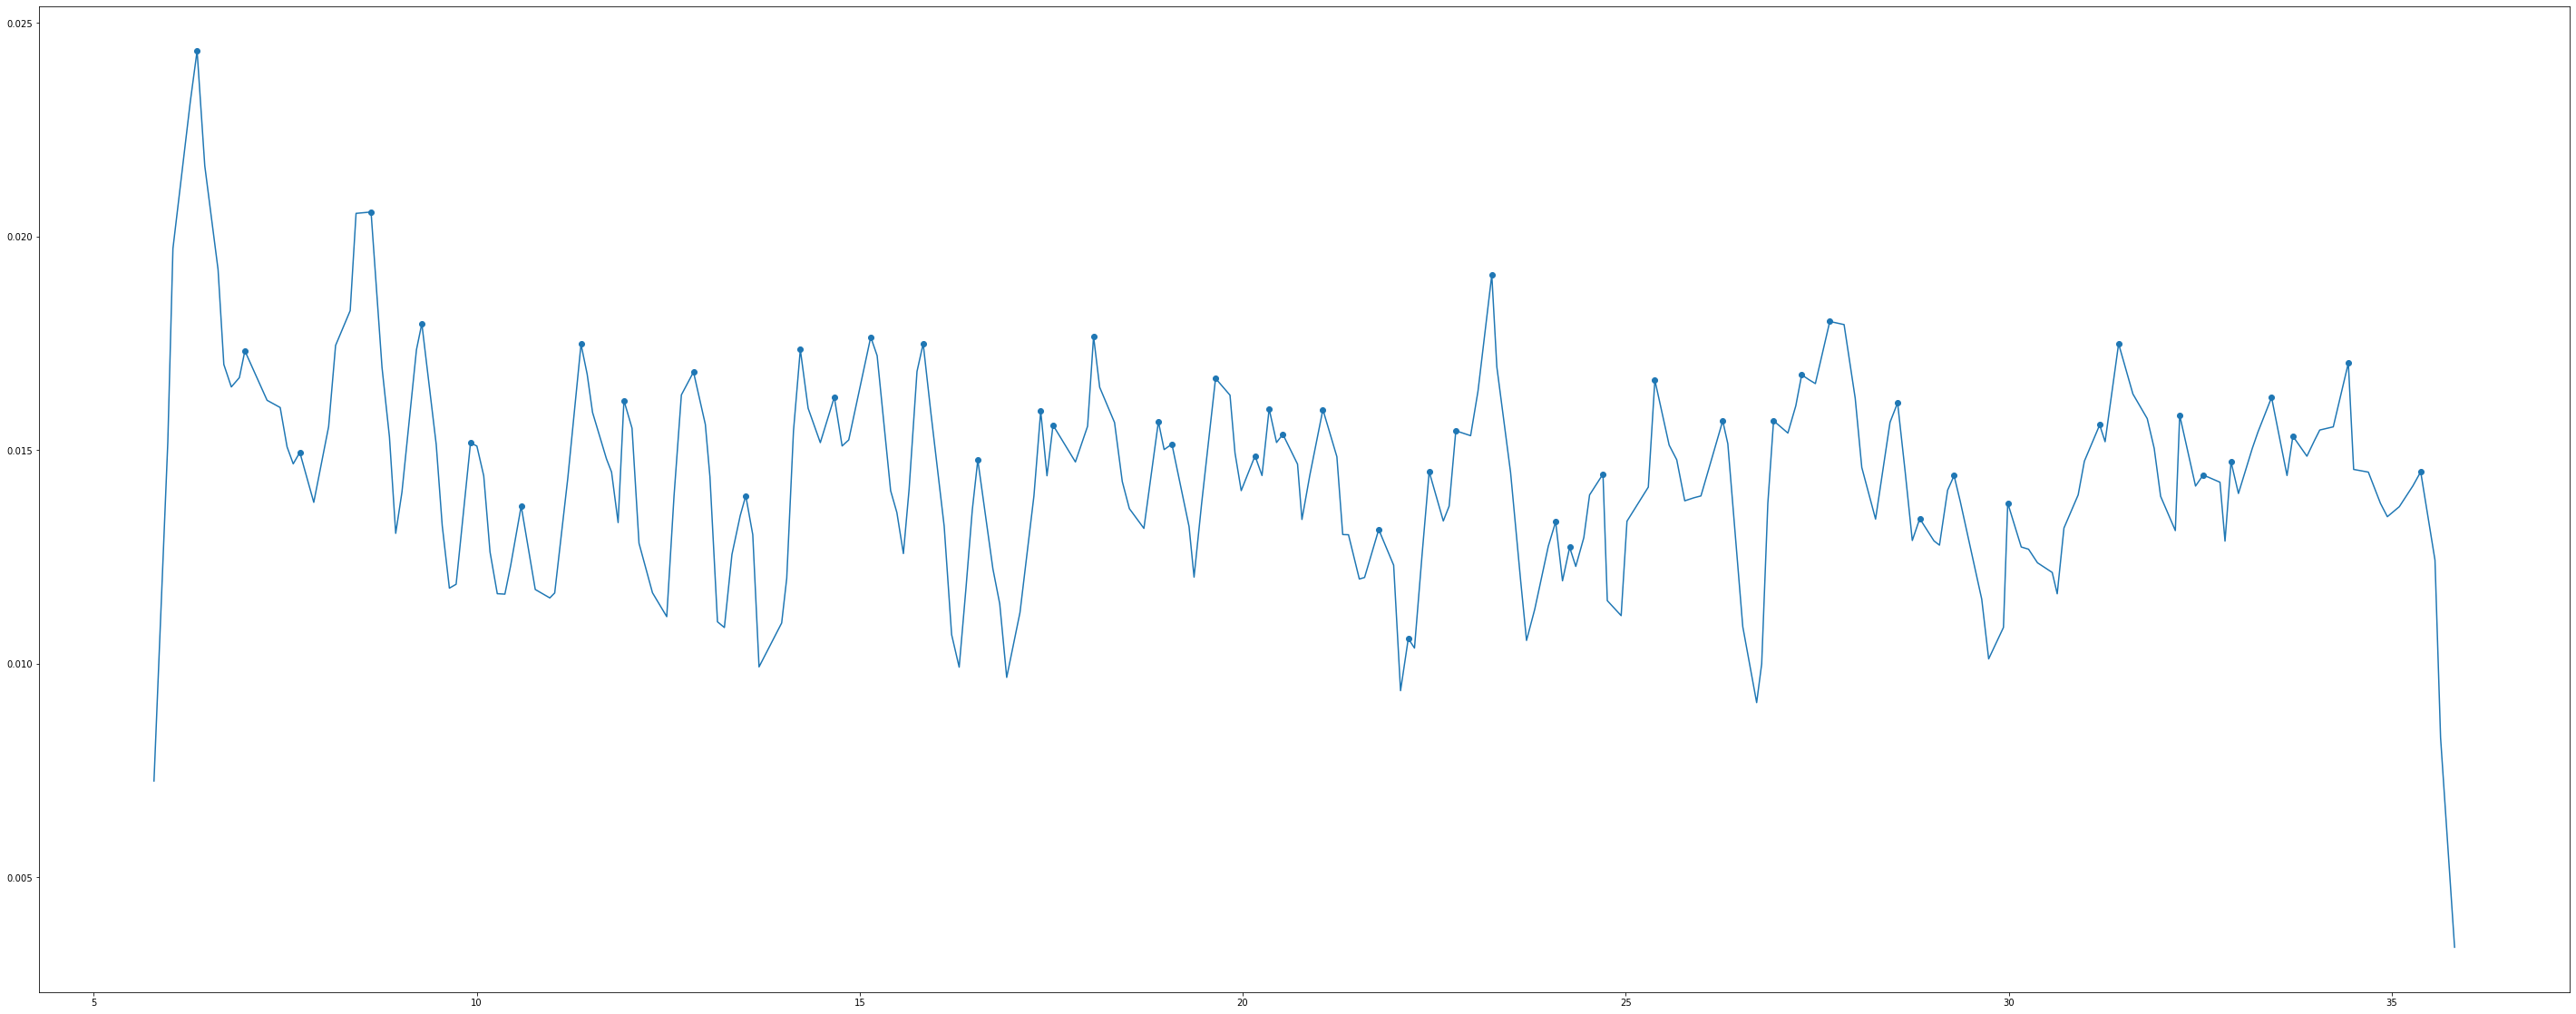

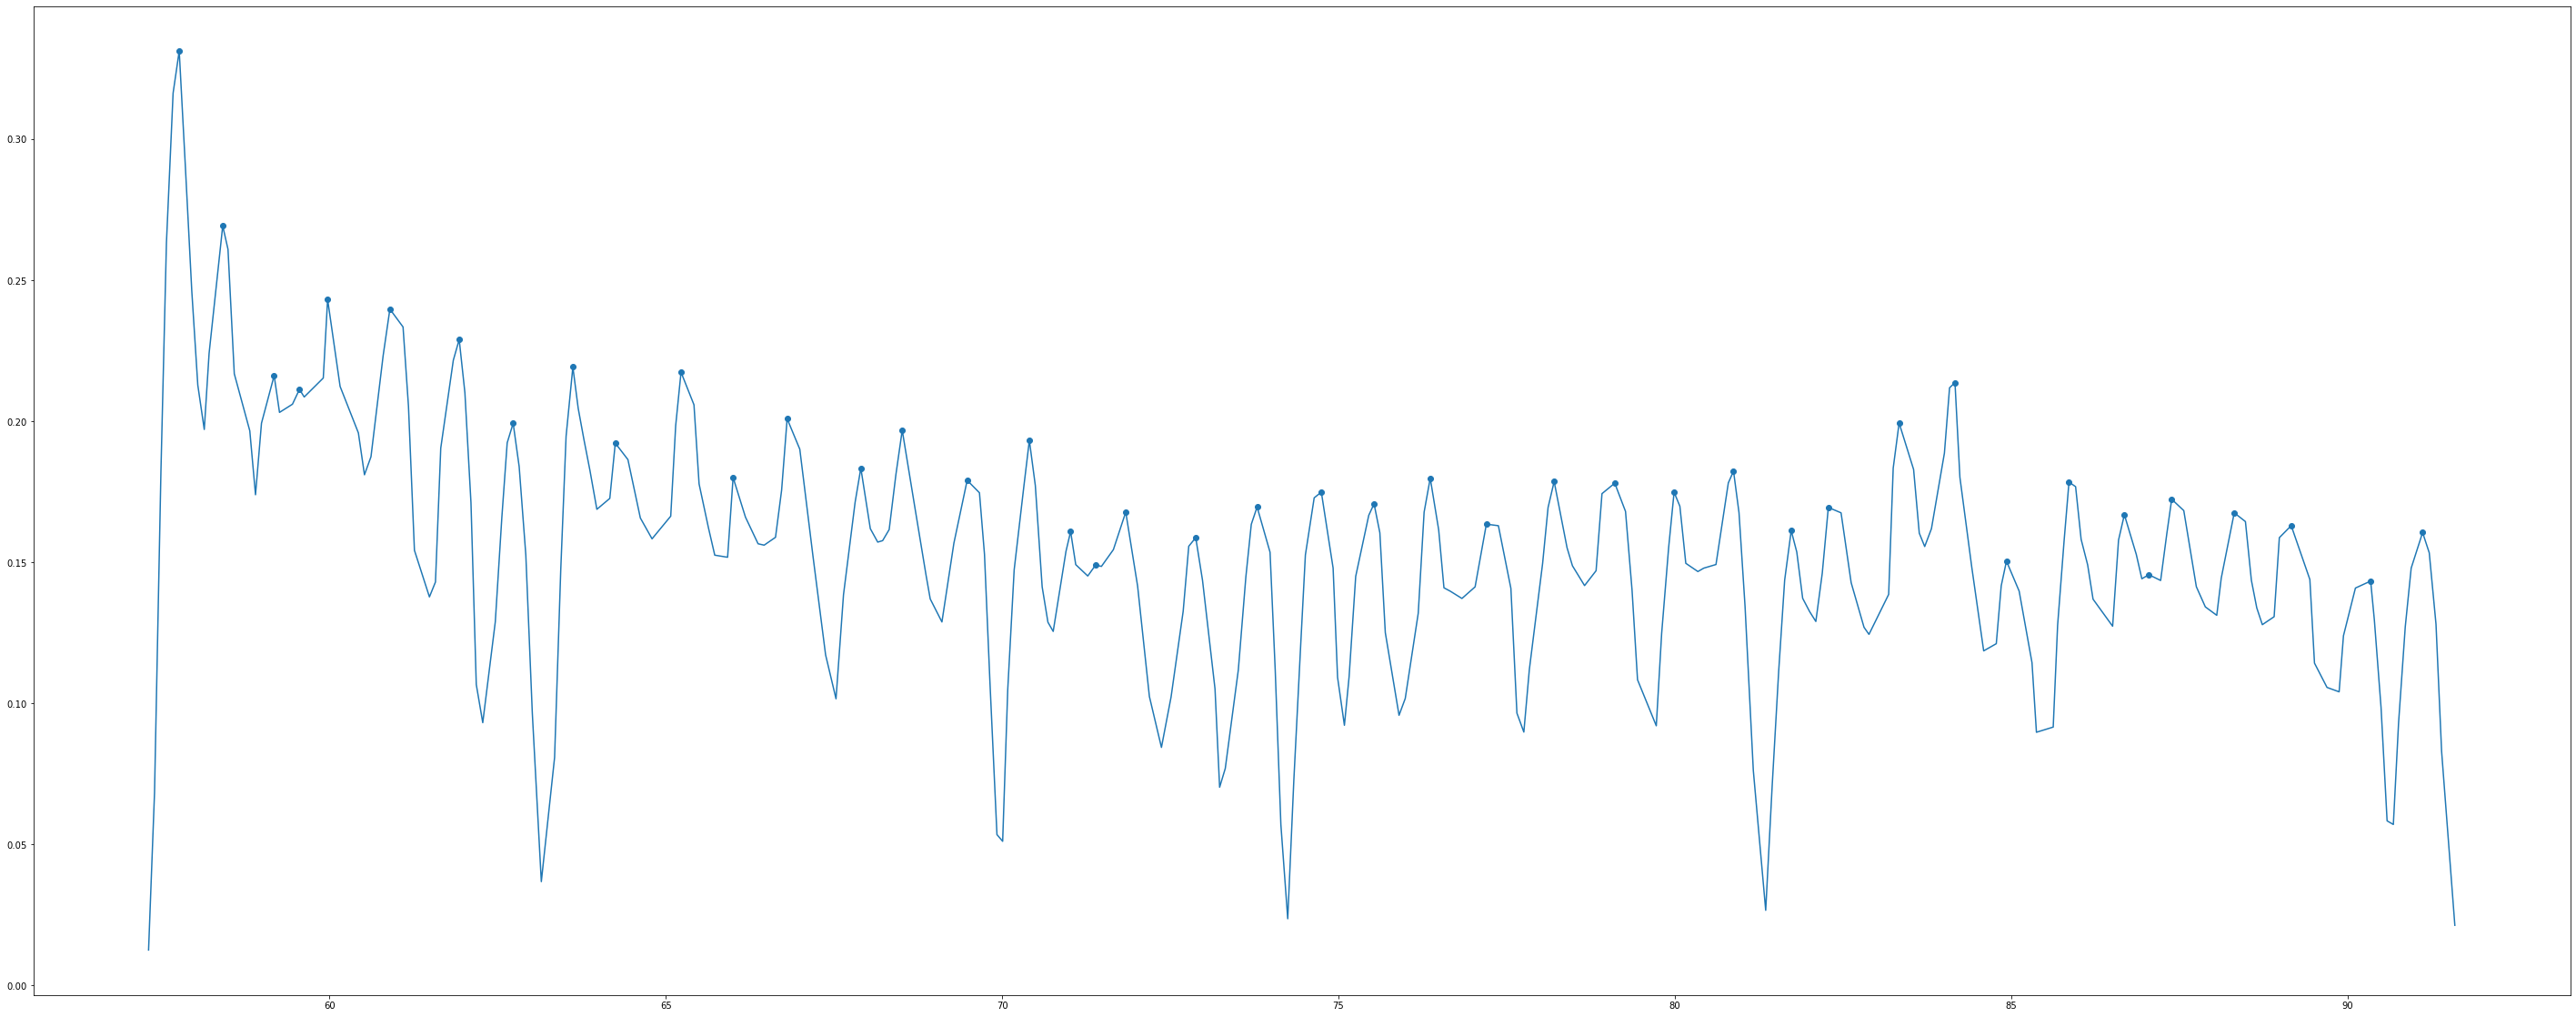

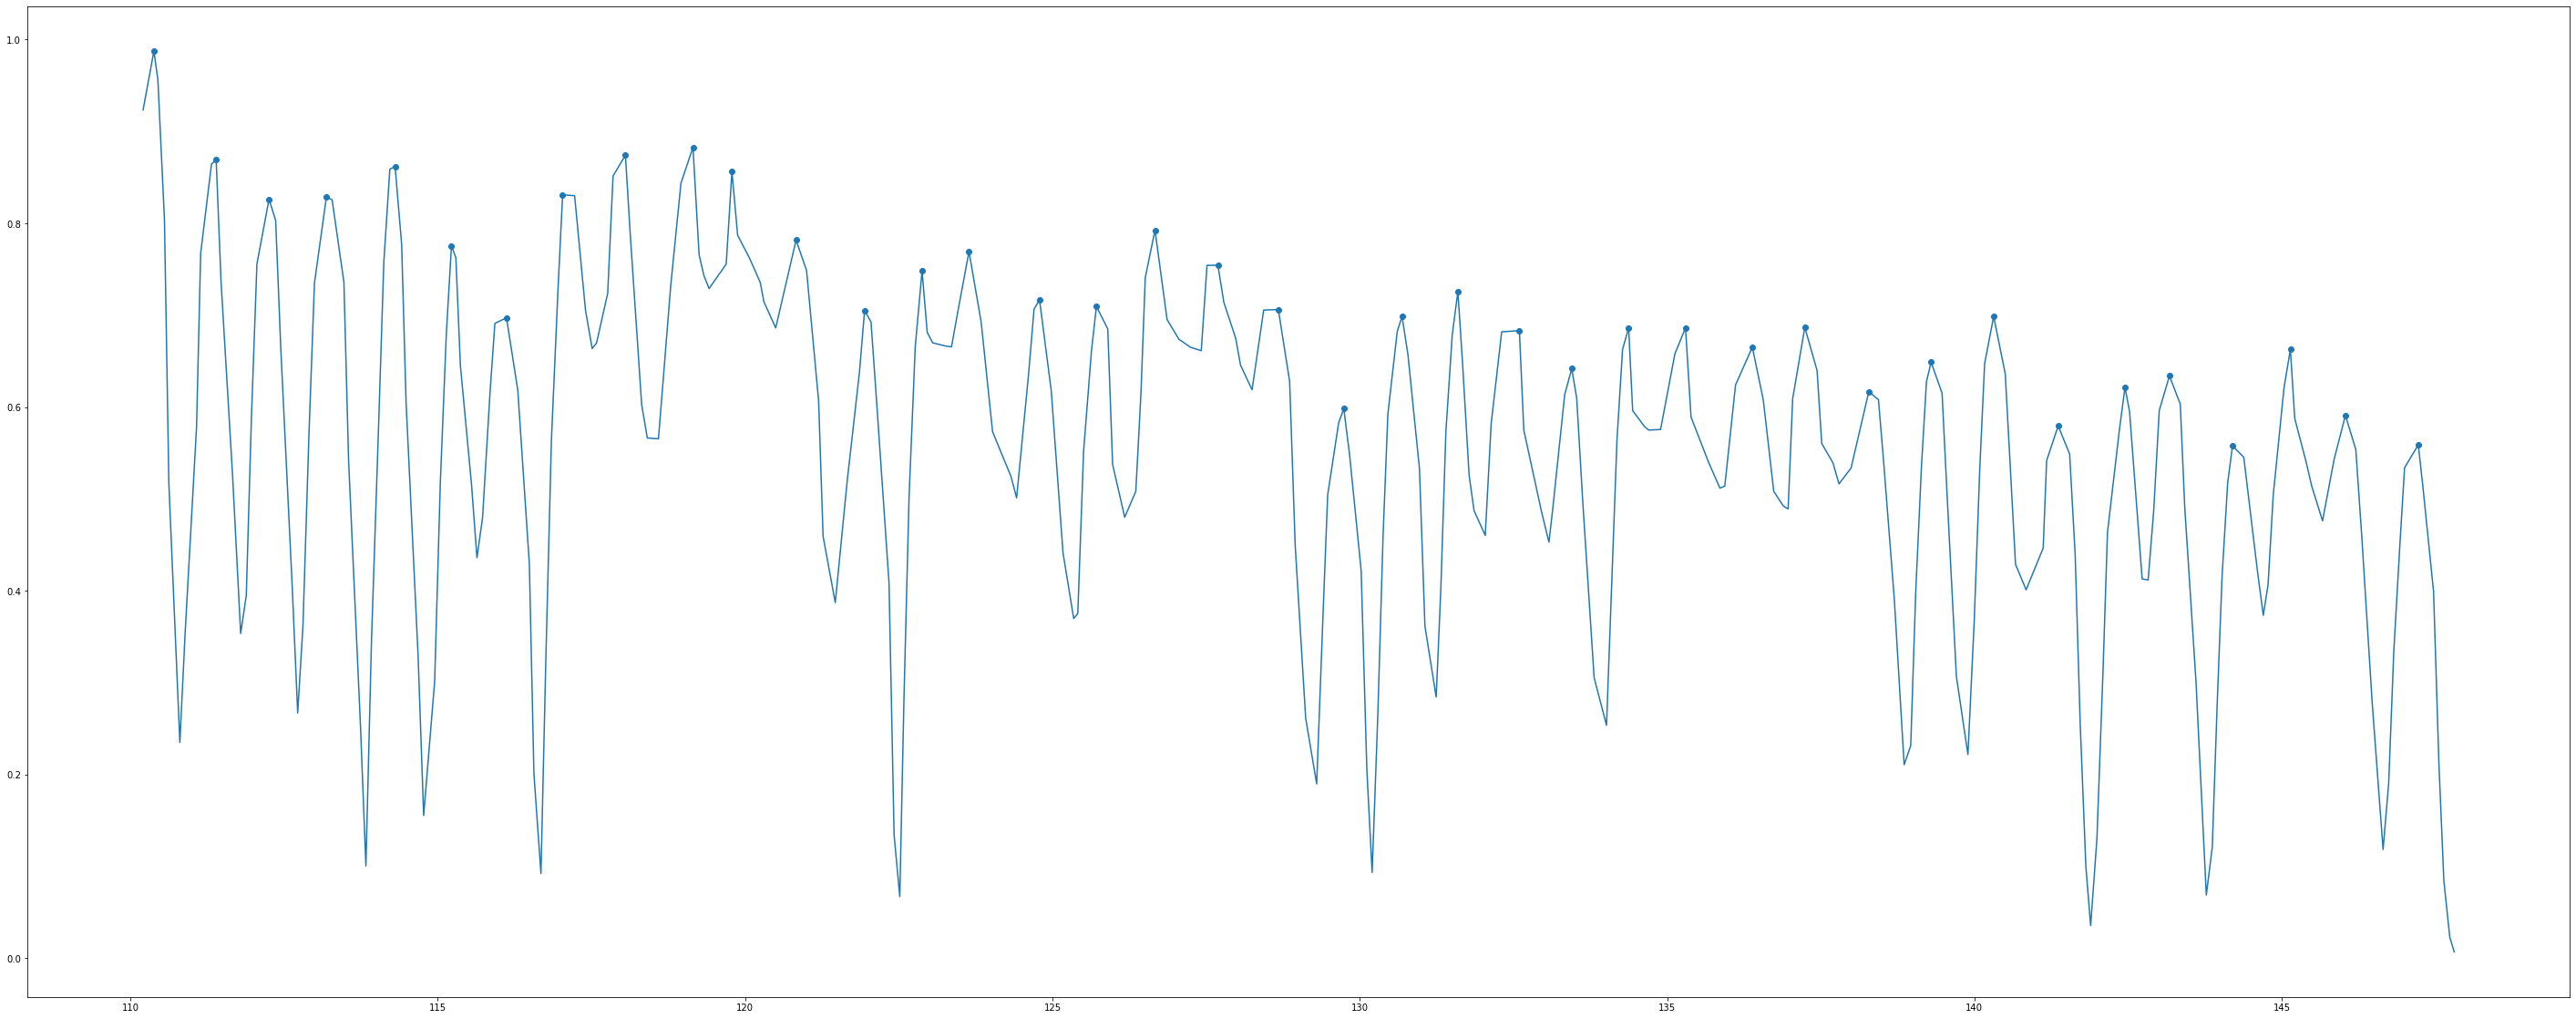

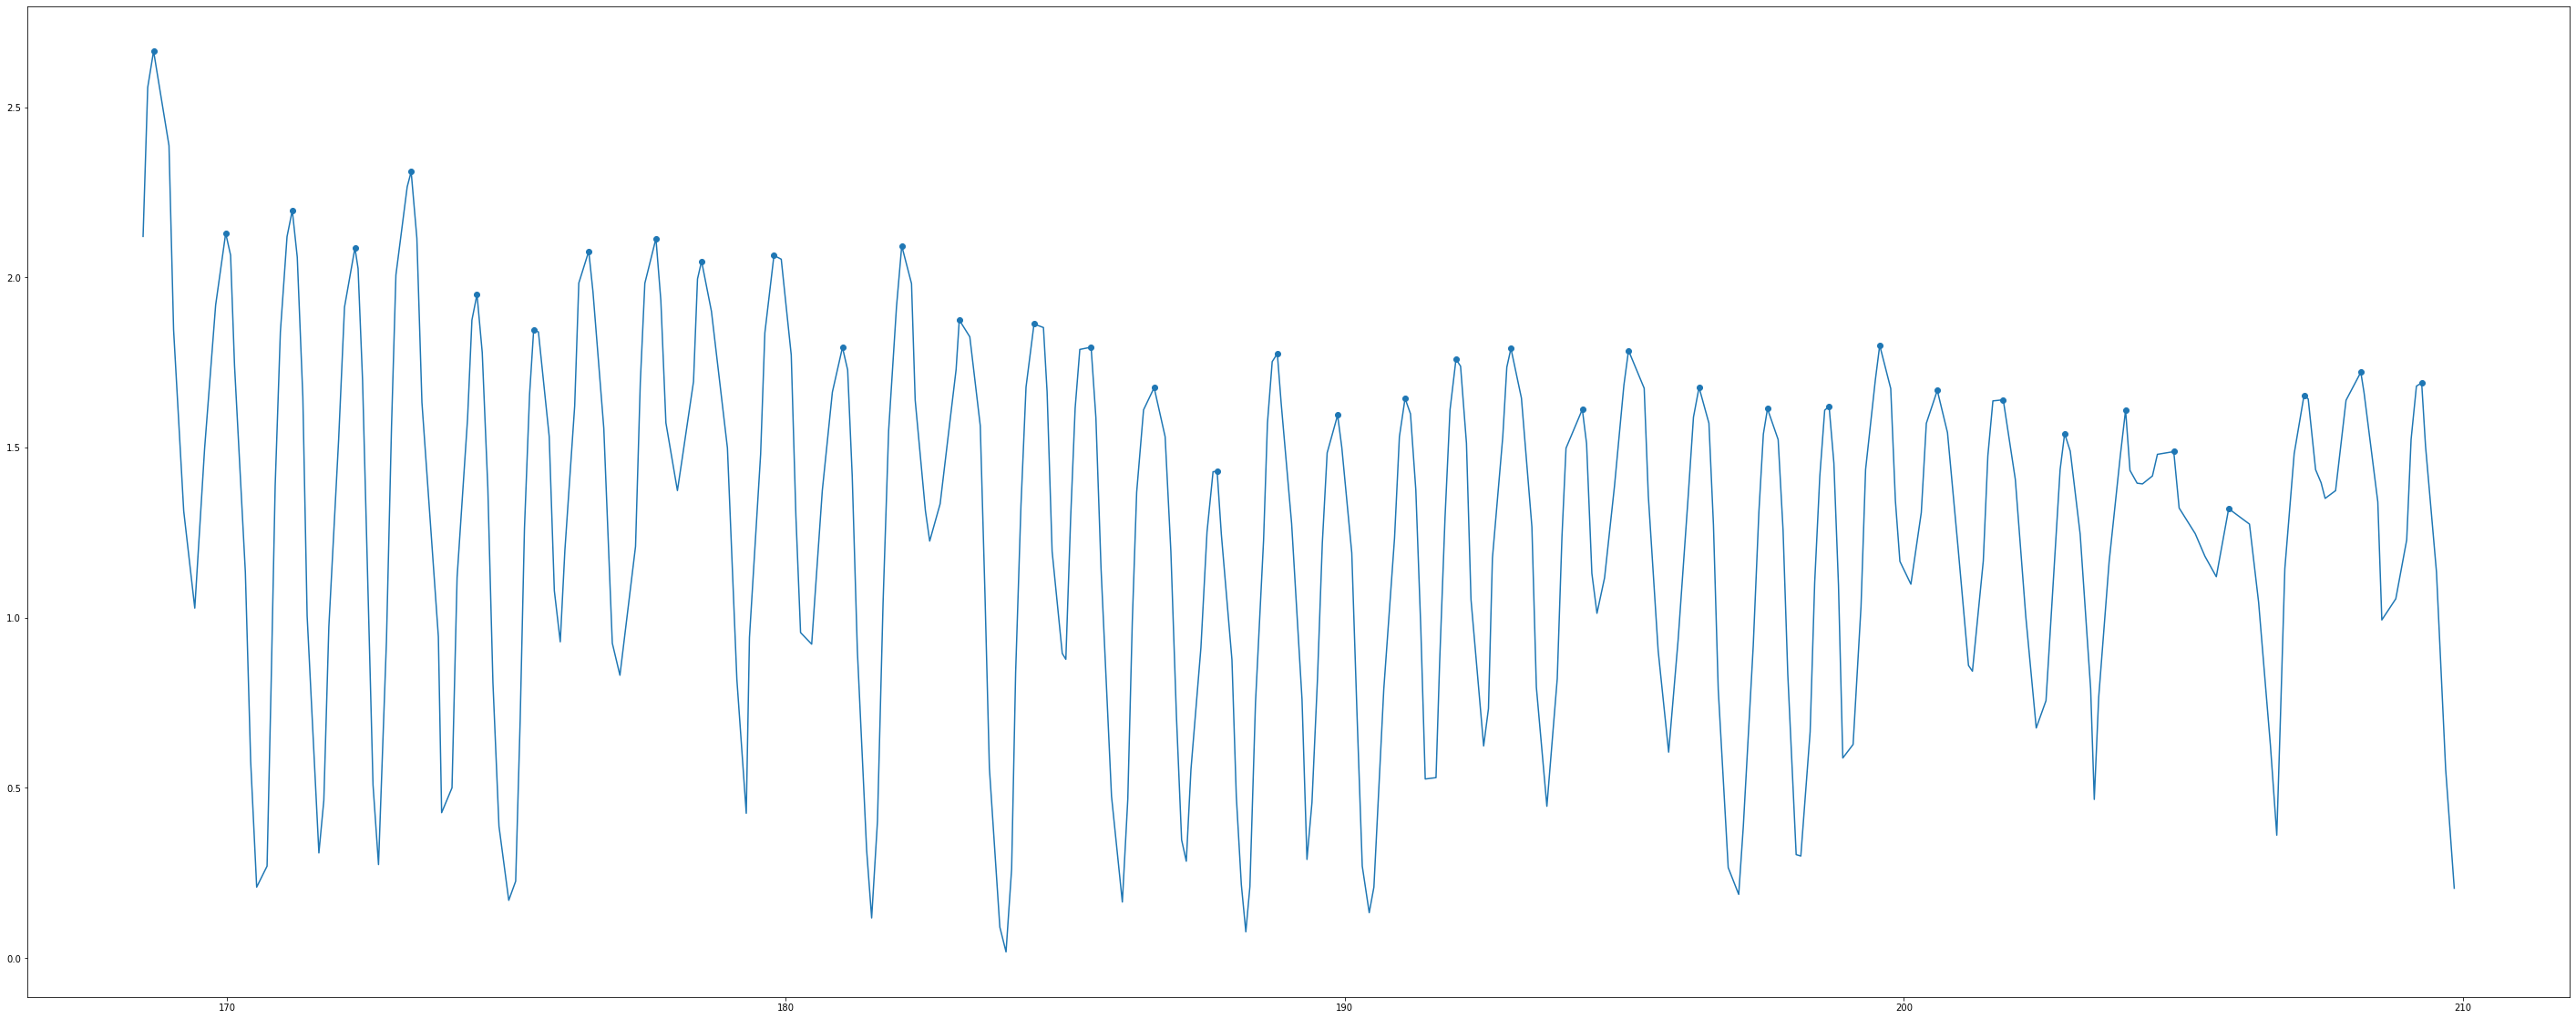

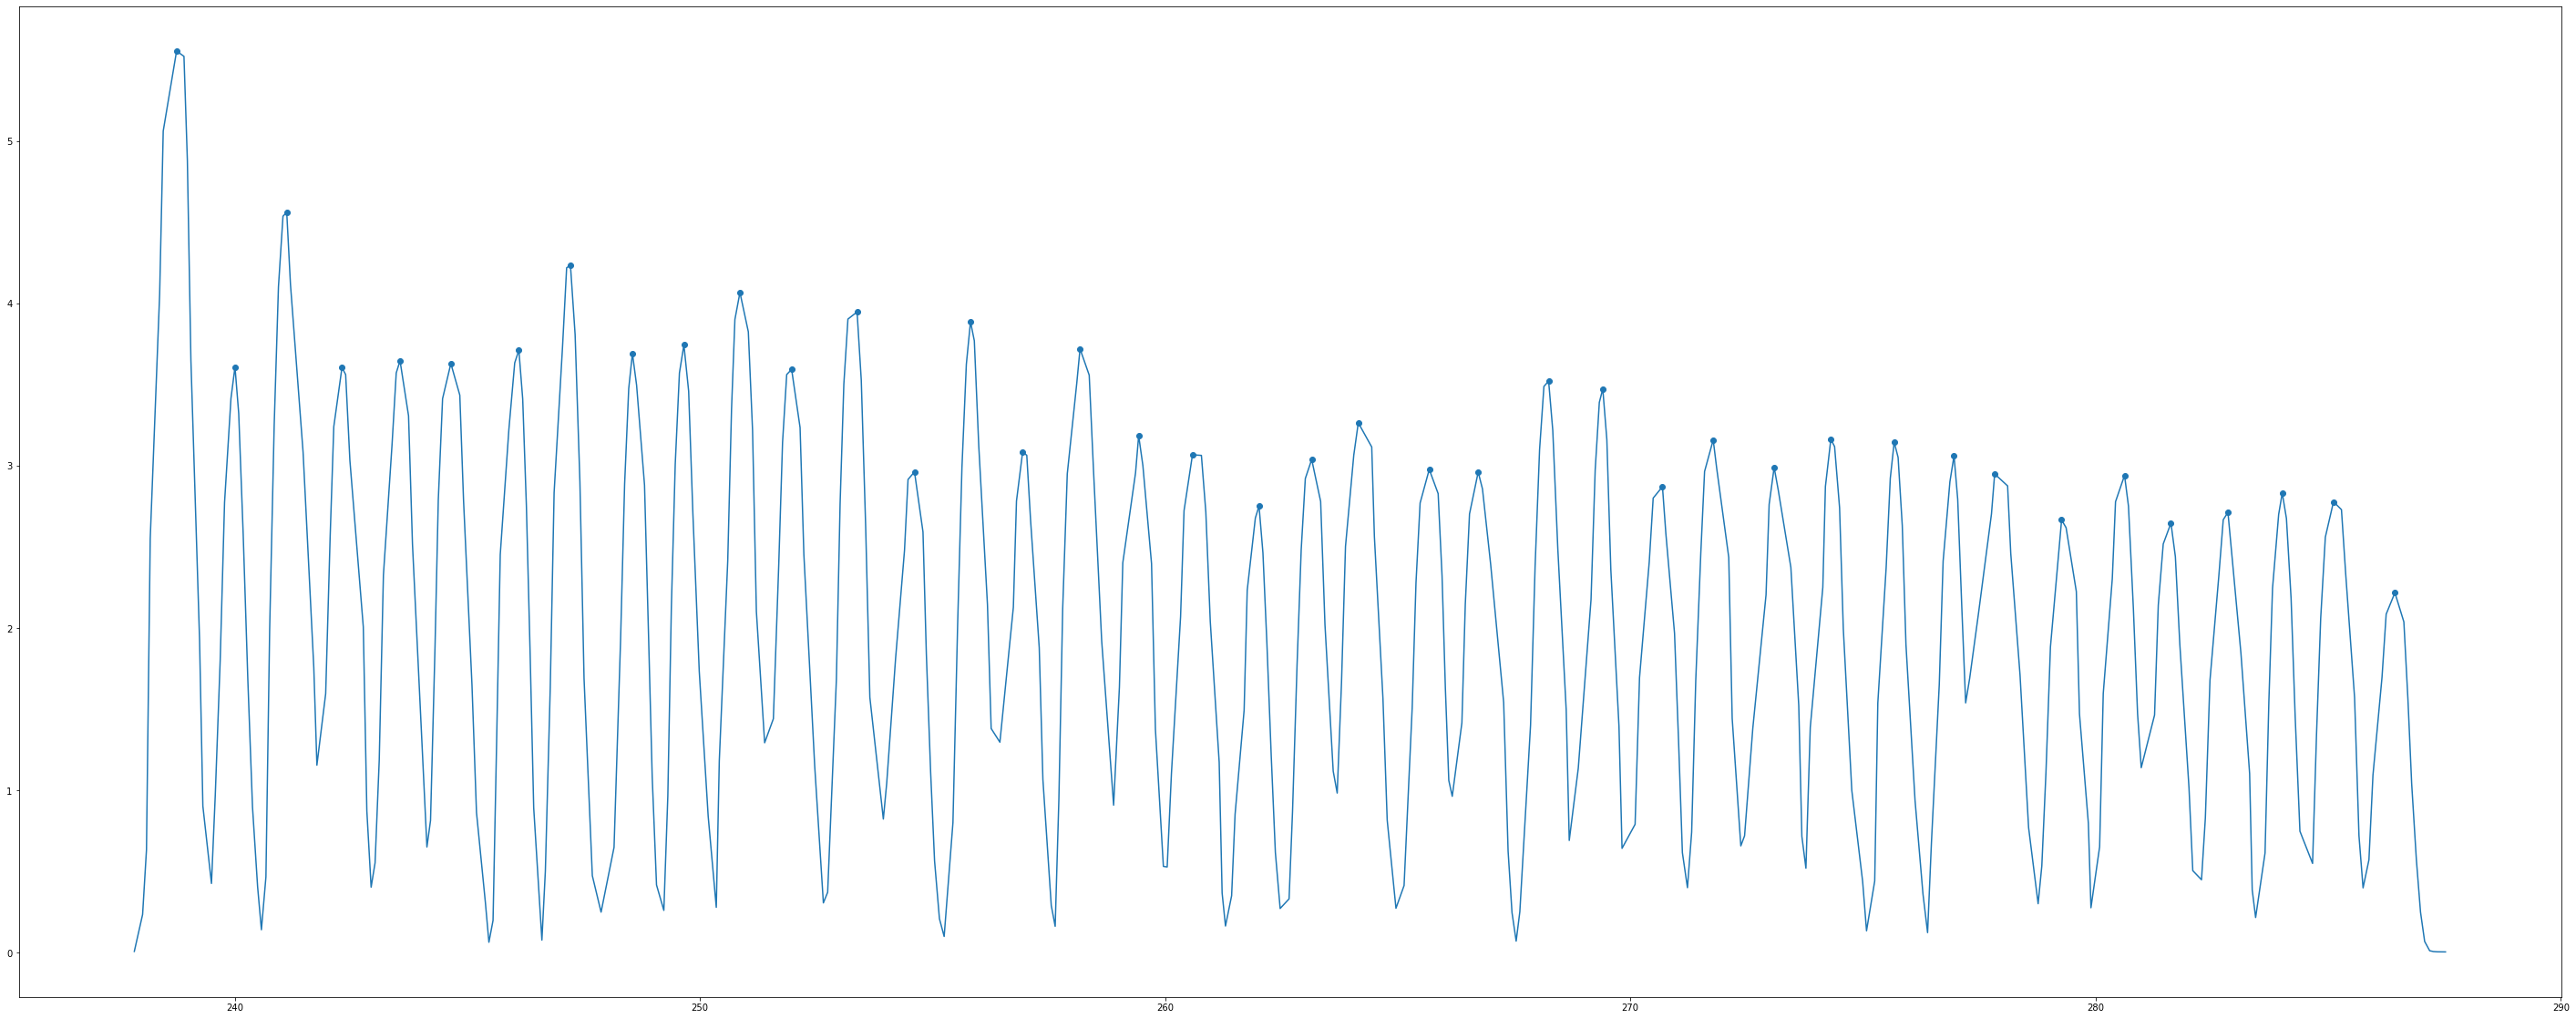

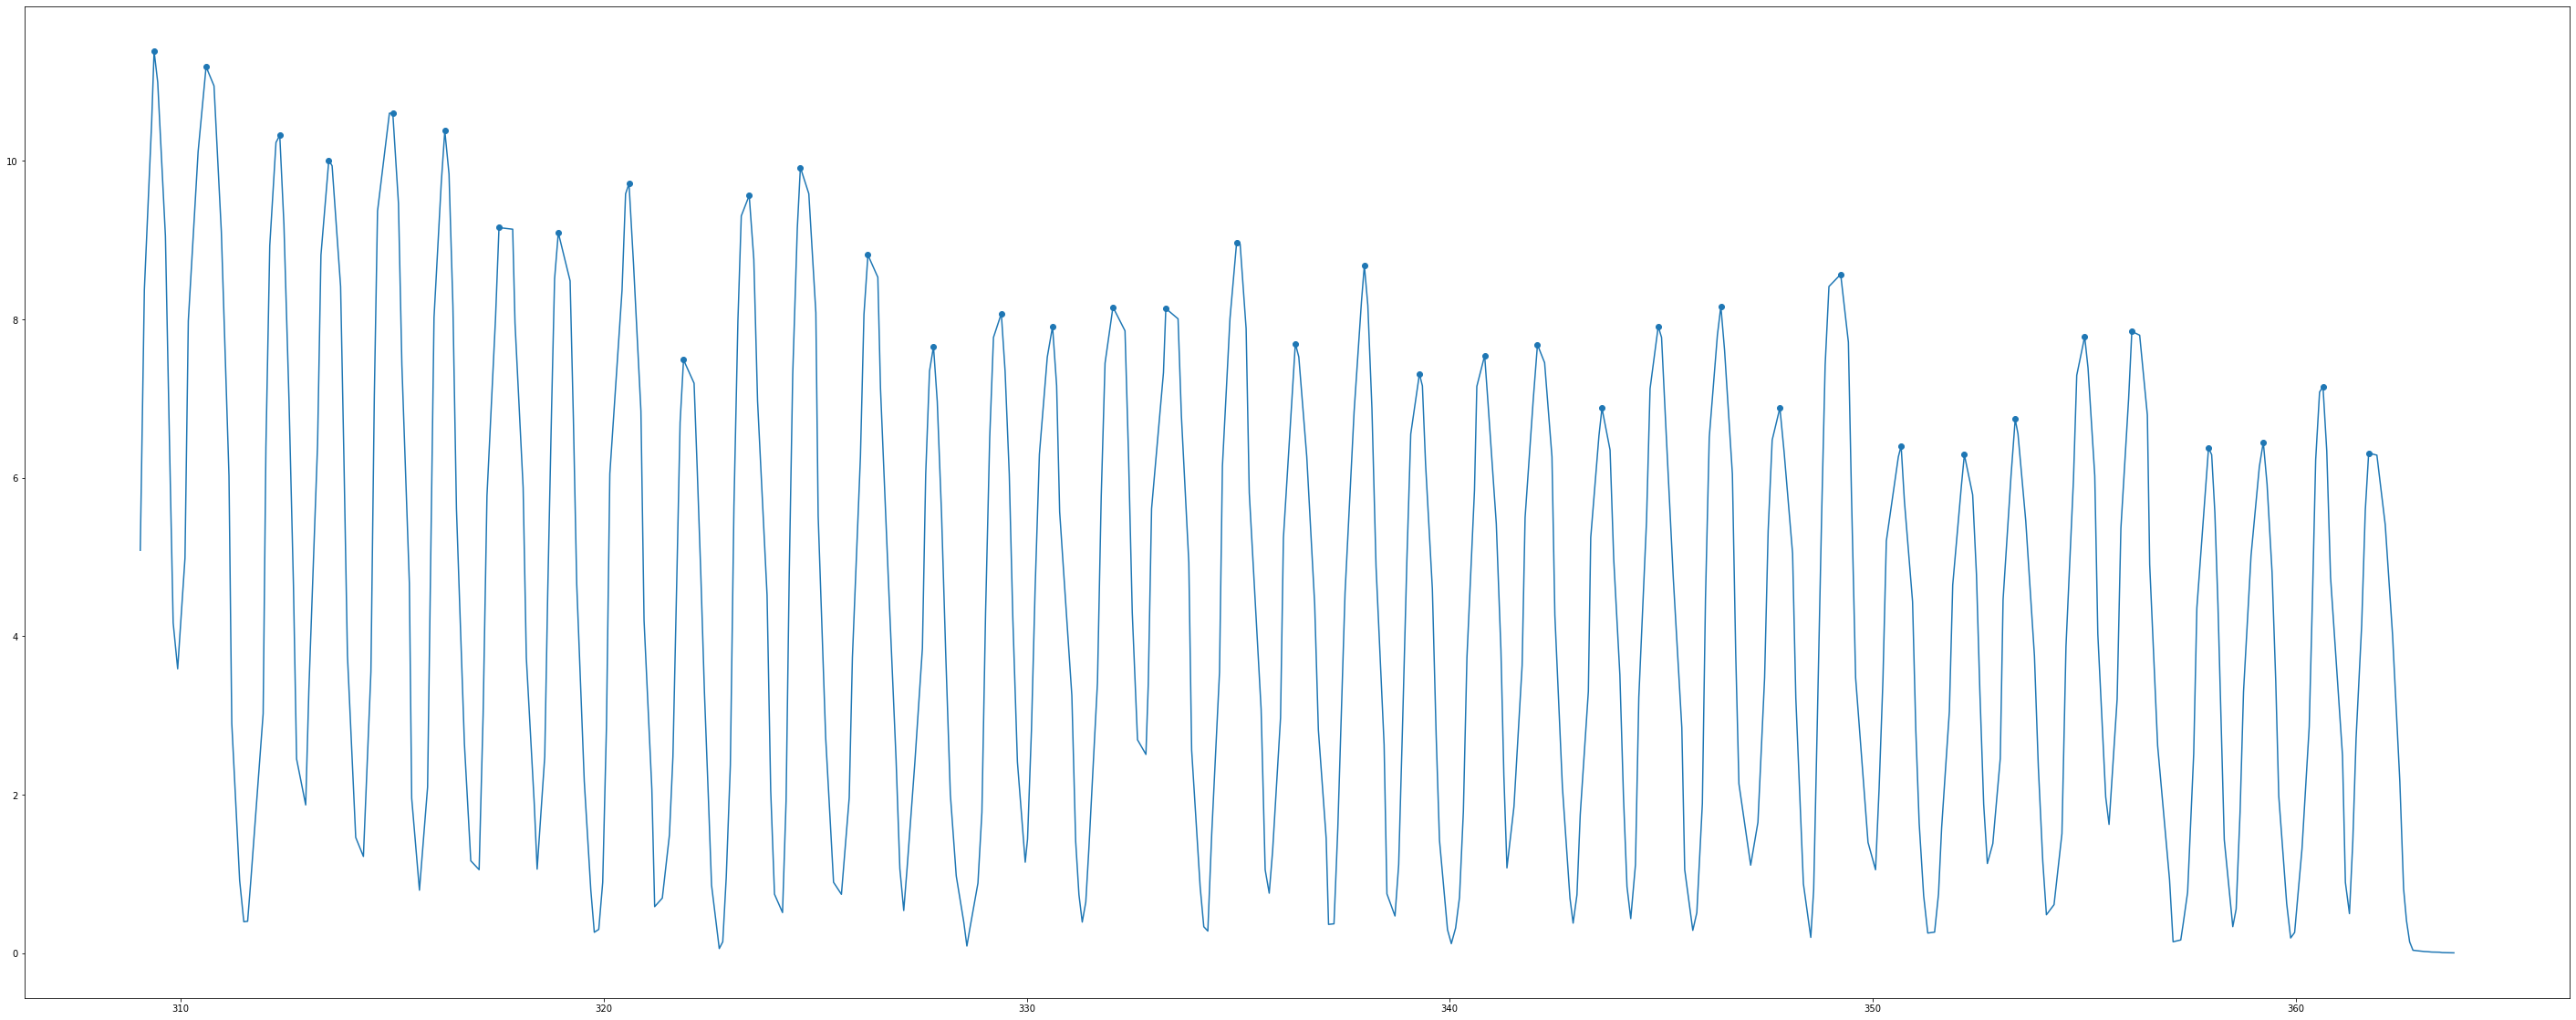

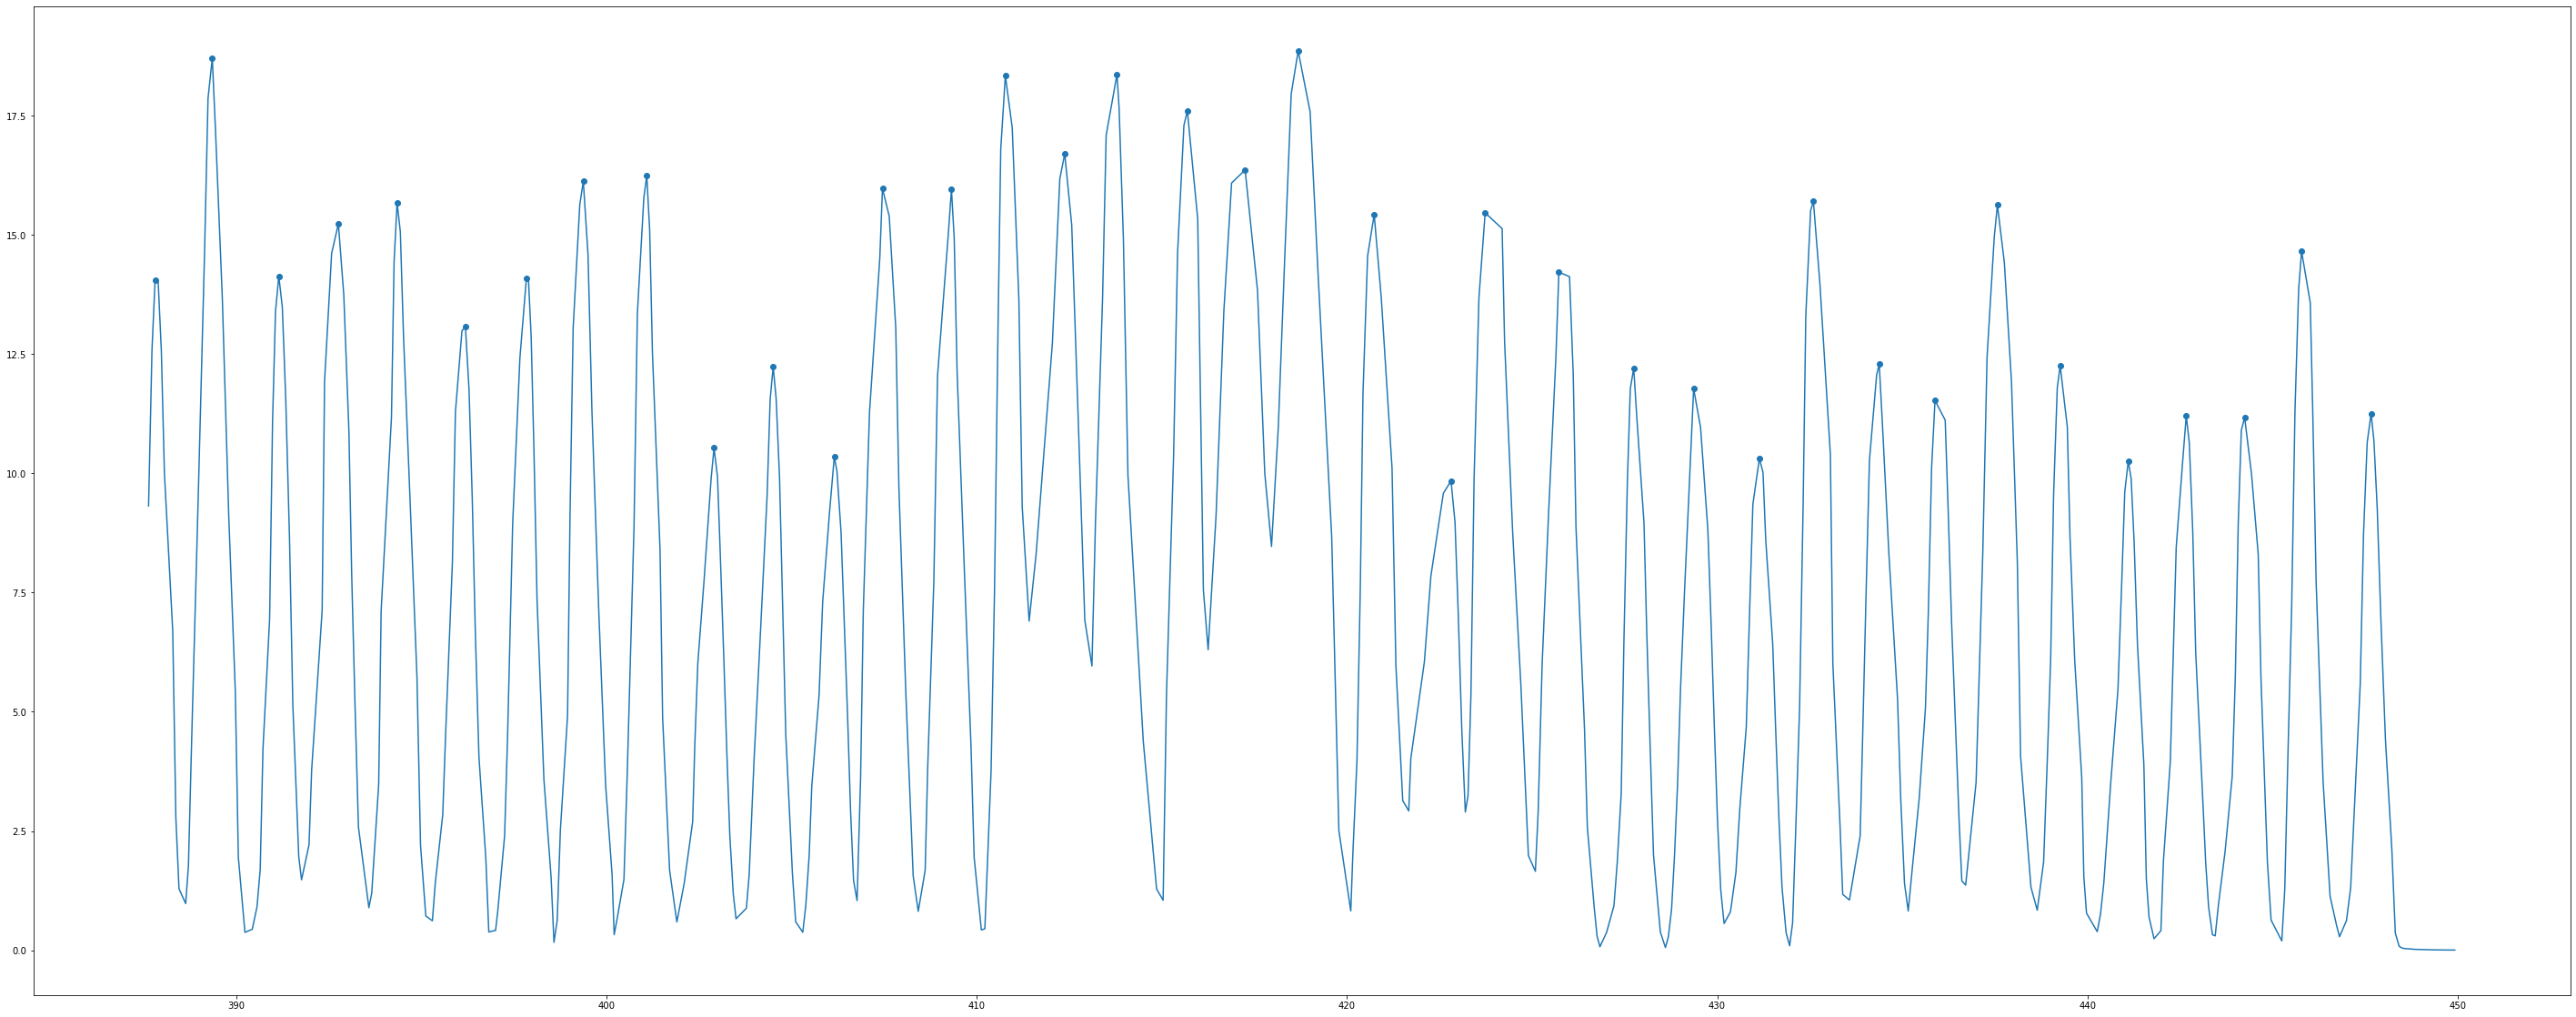

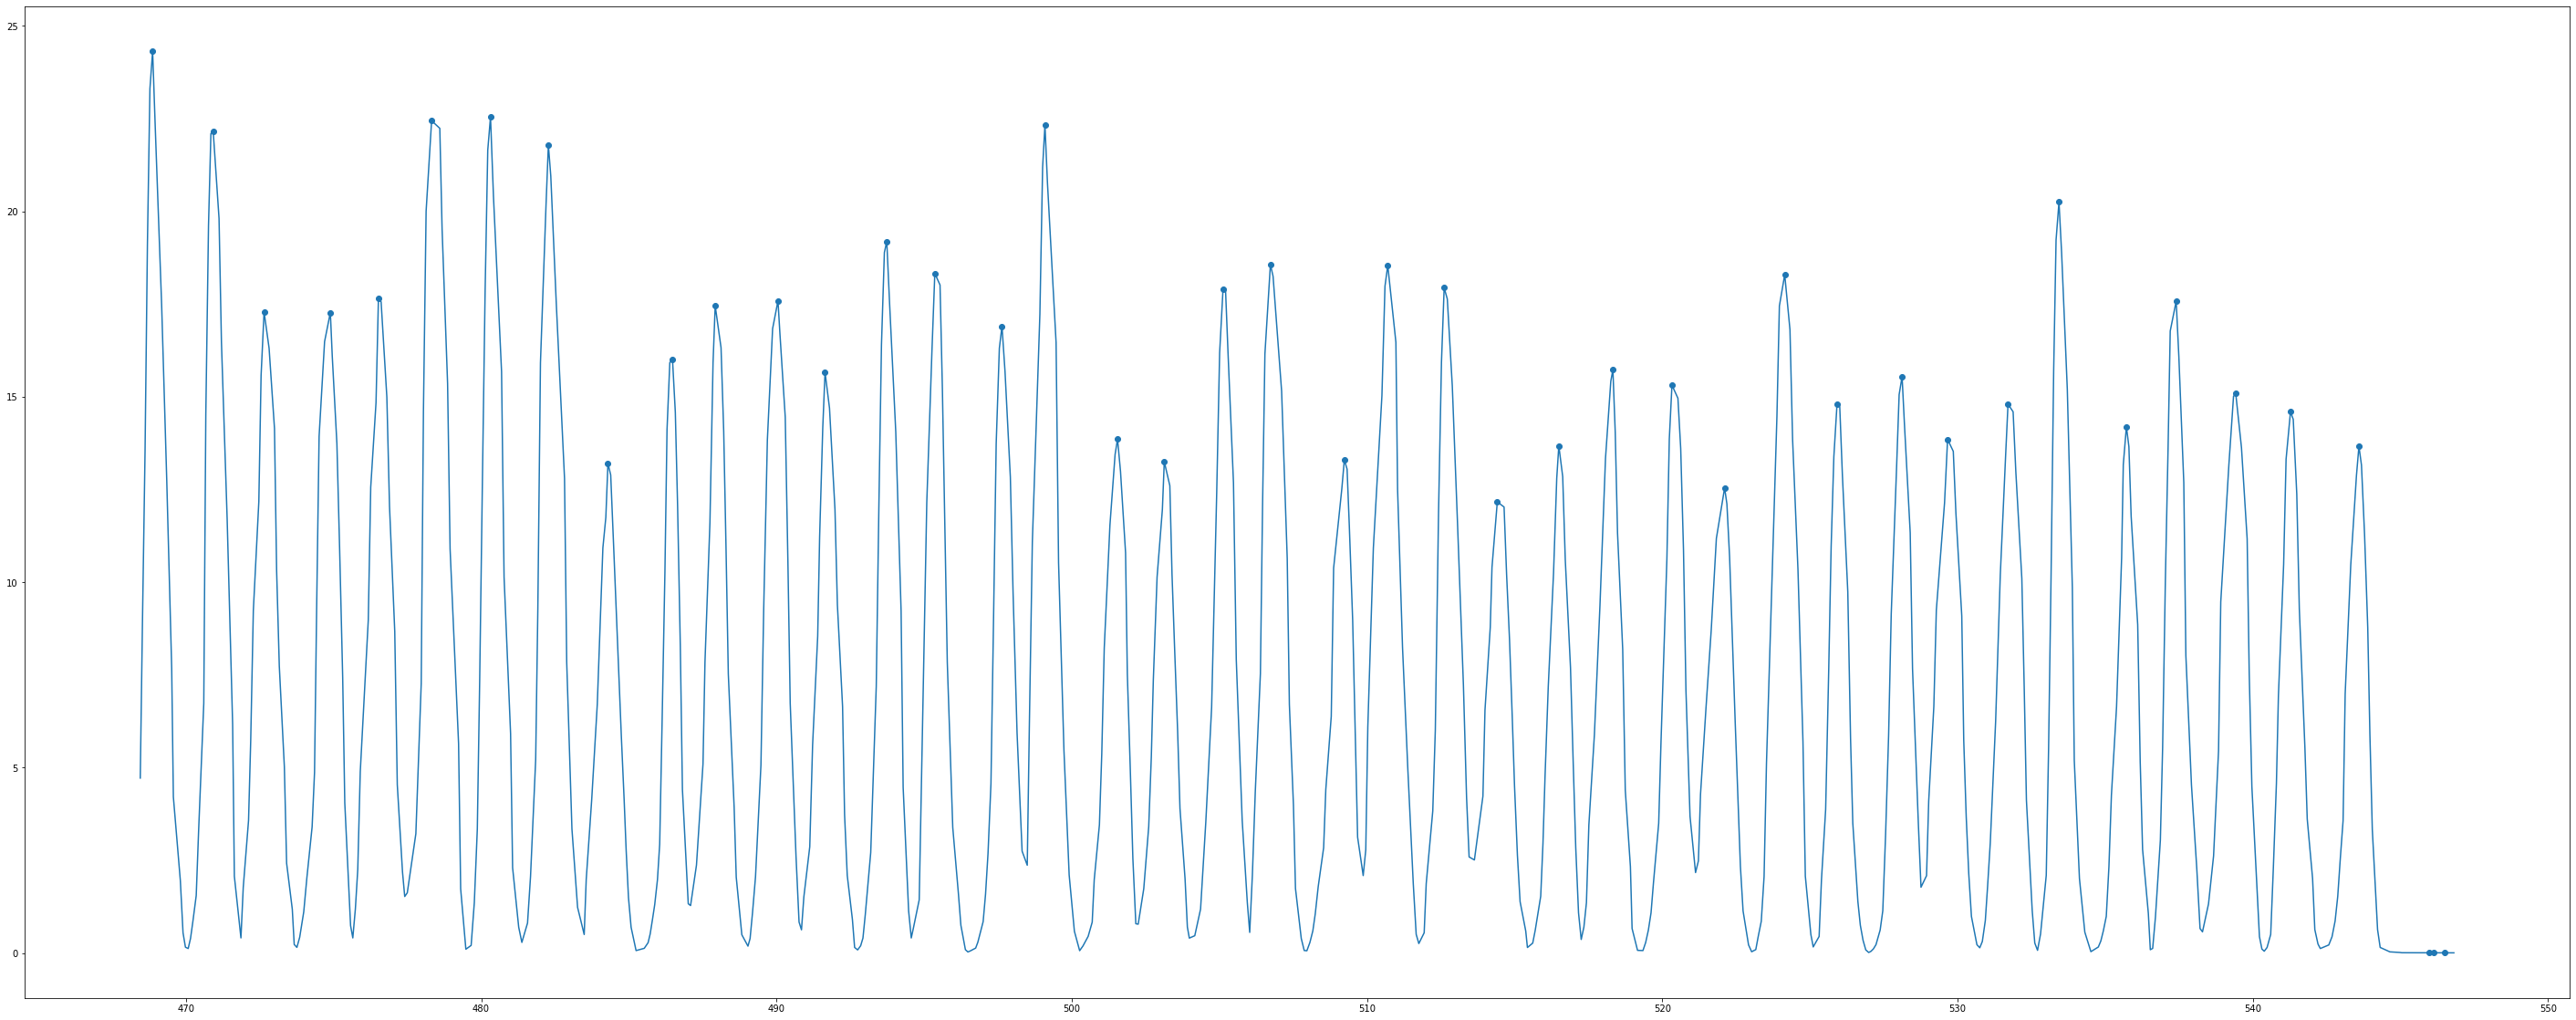

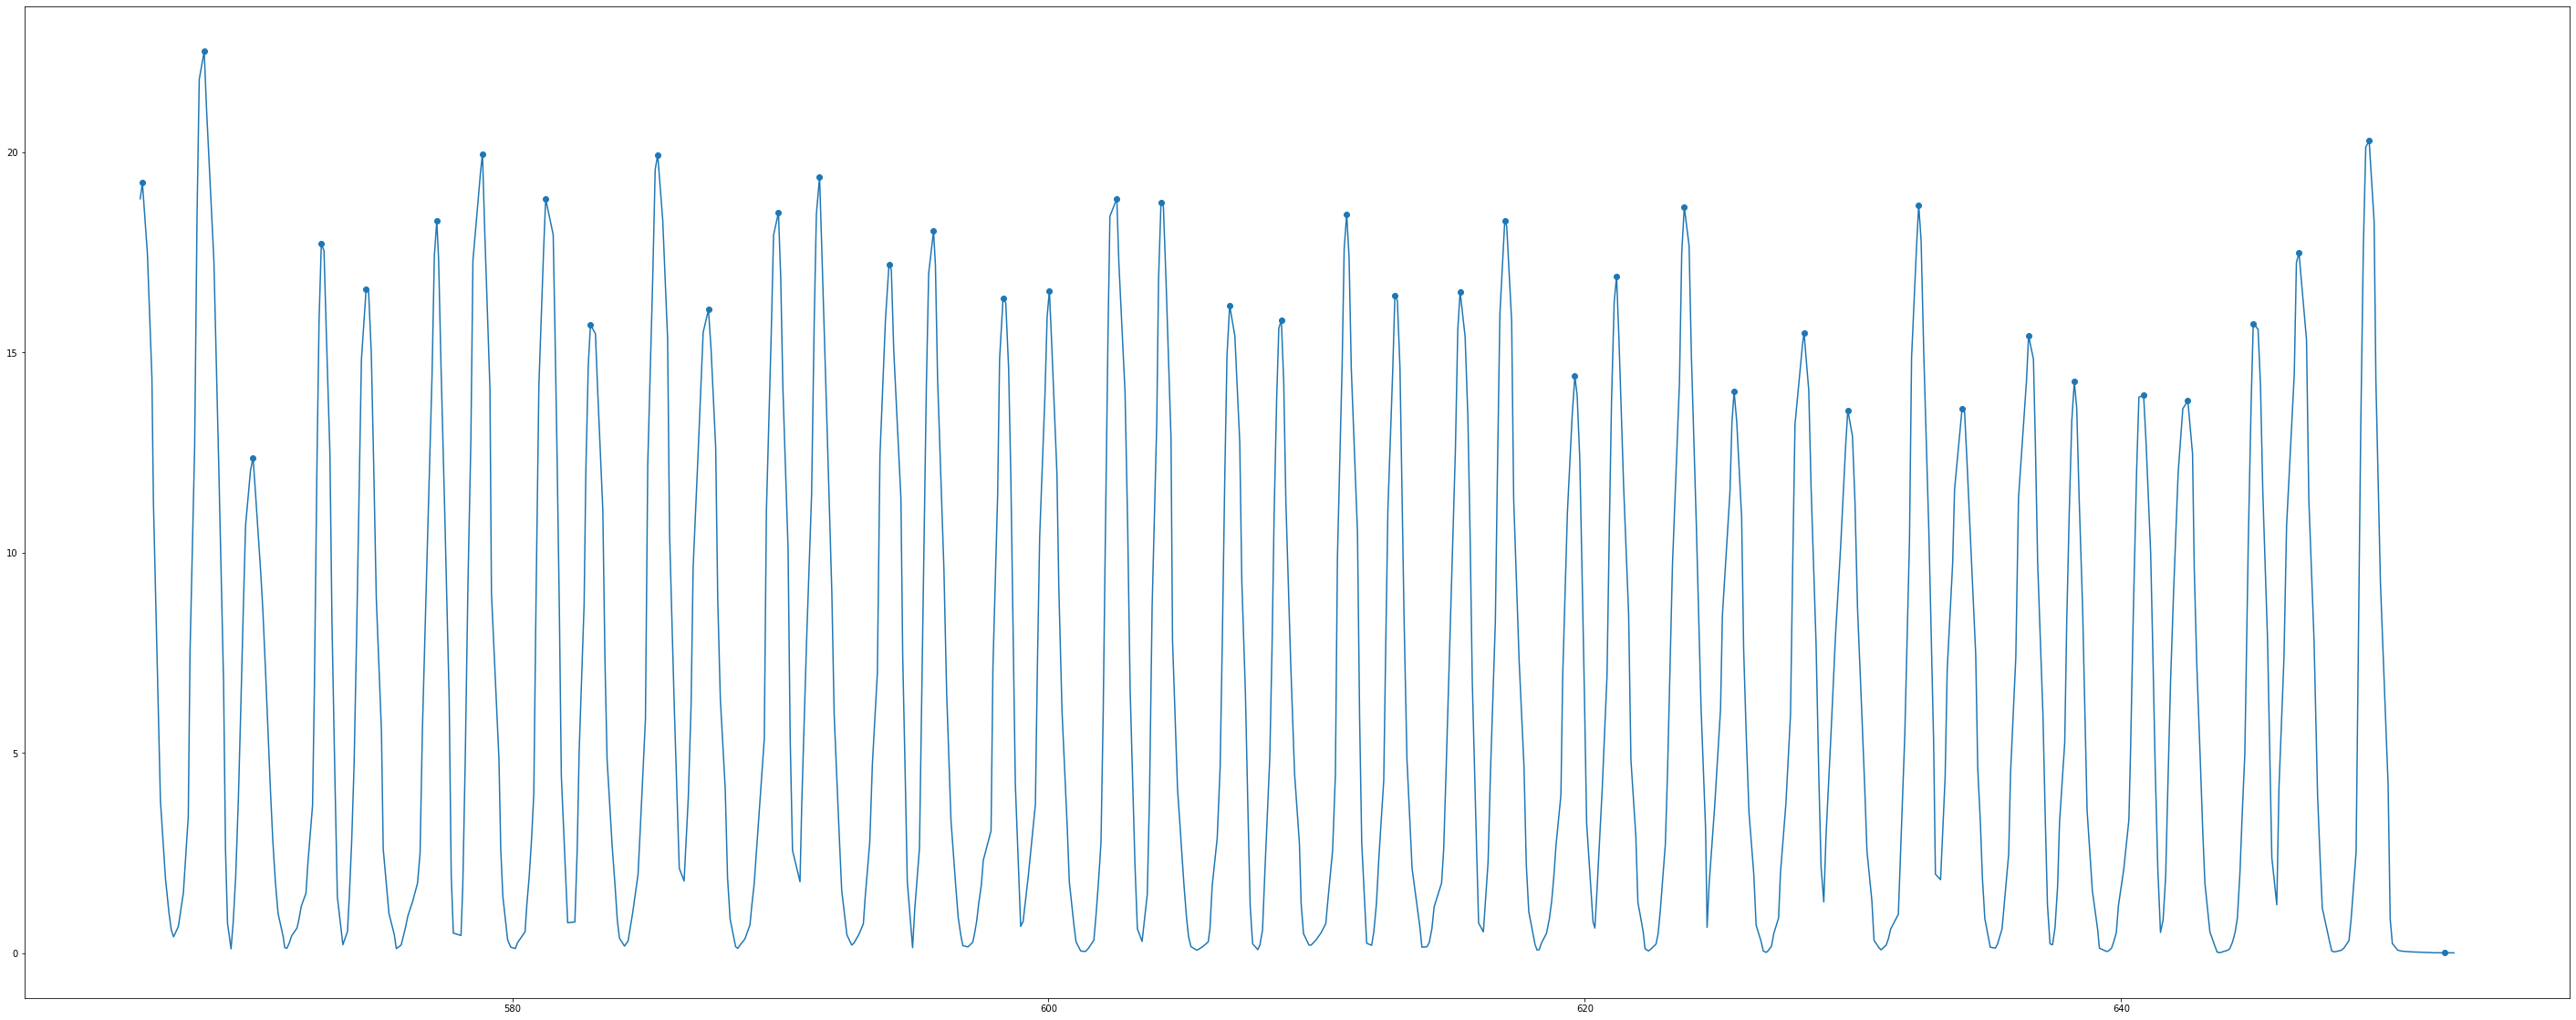

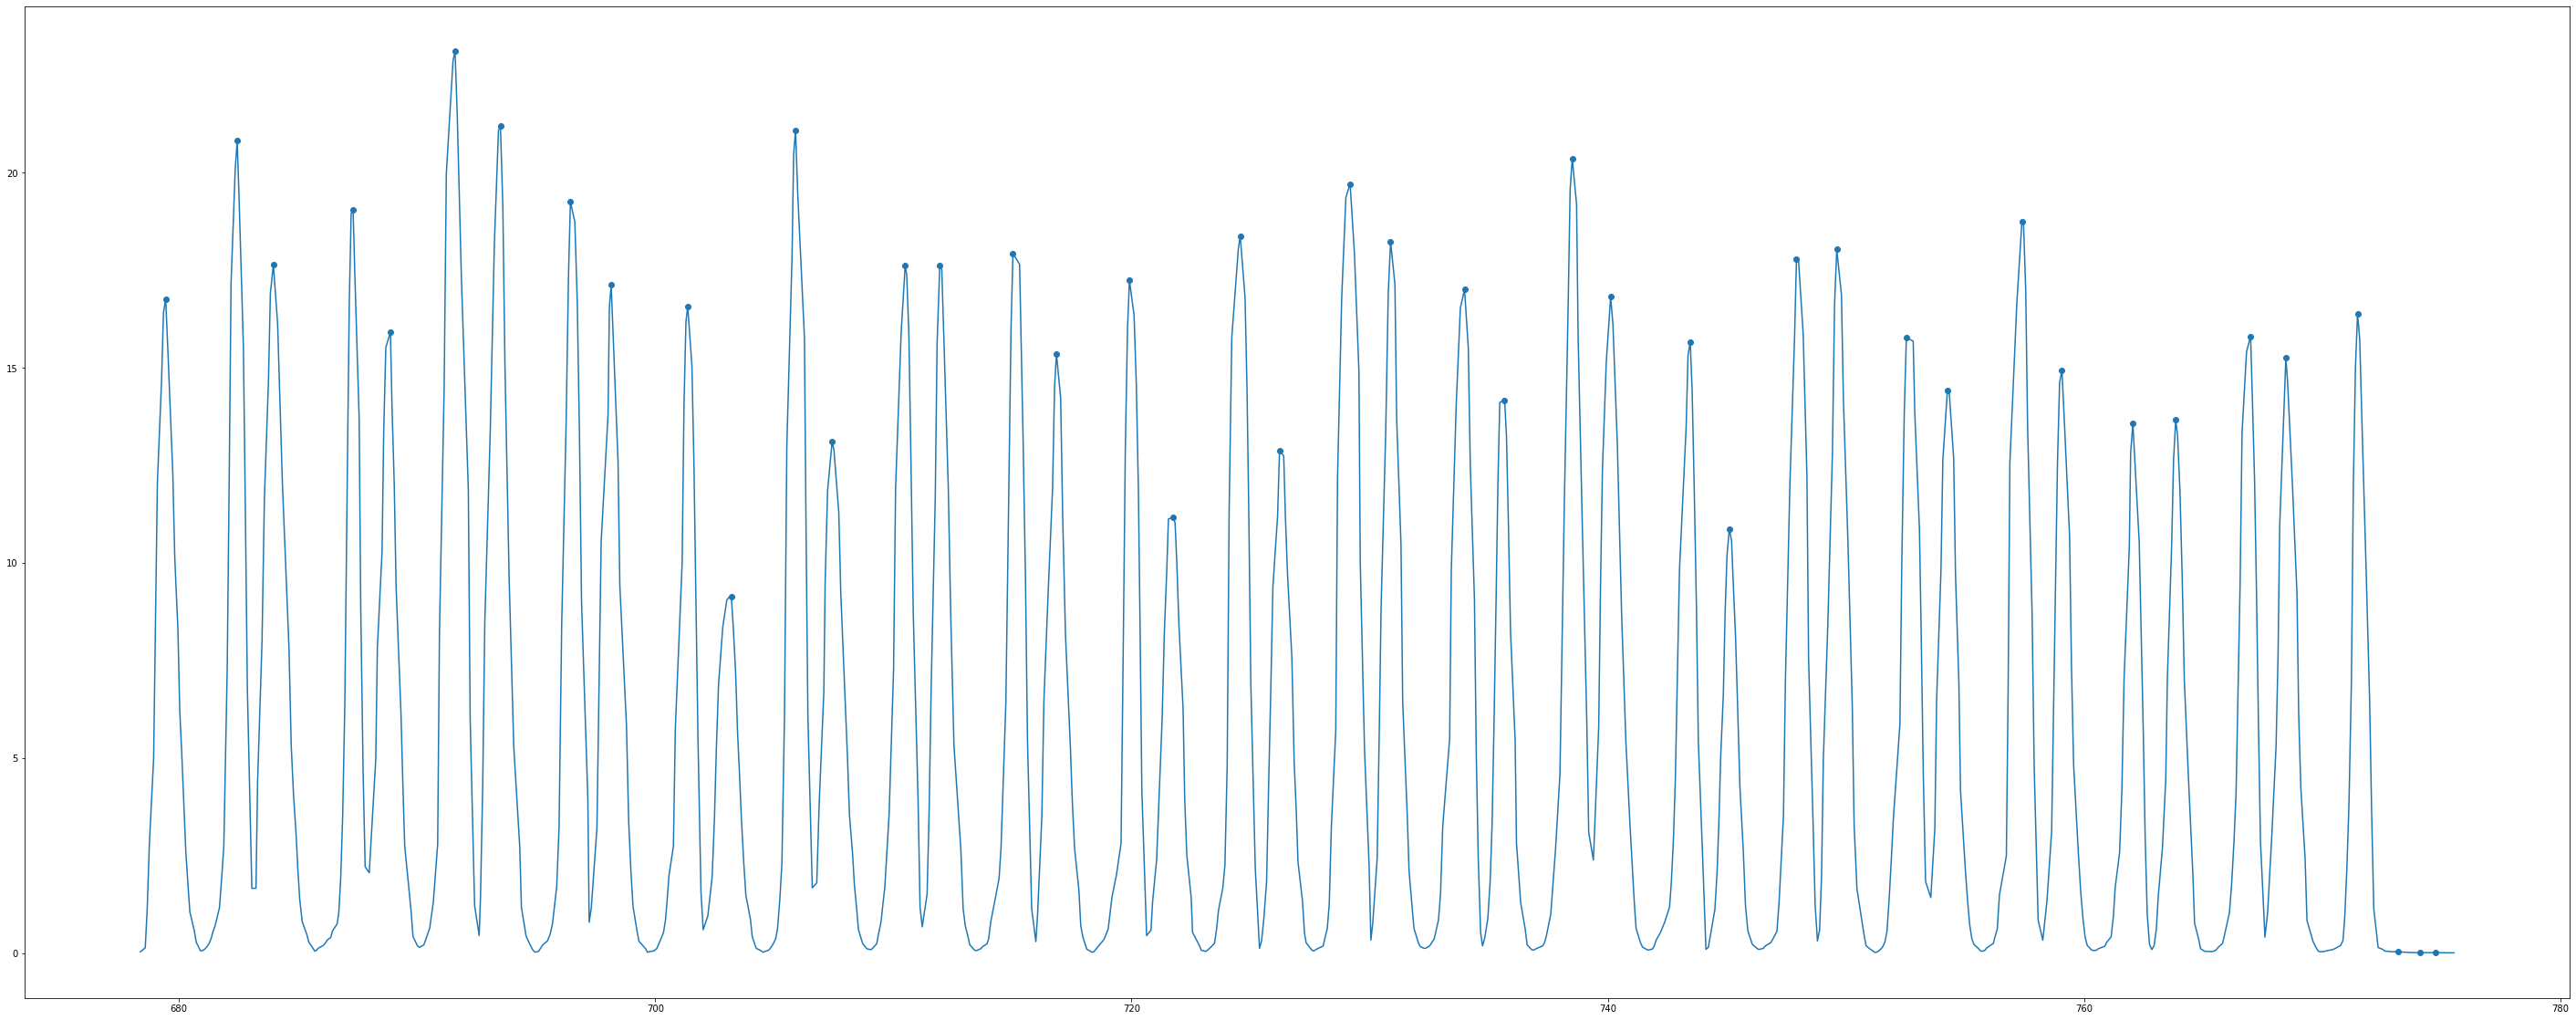

In [11]:
slicer (NE2["Unnamed: 0"],NE2["s4_d"])

Sensor 4 is more profound for NE2


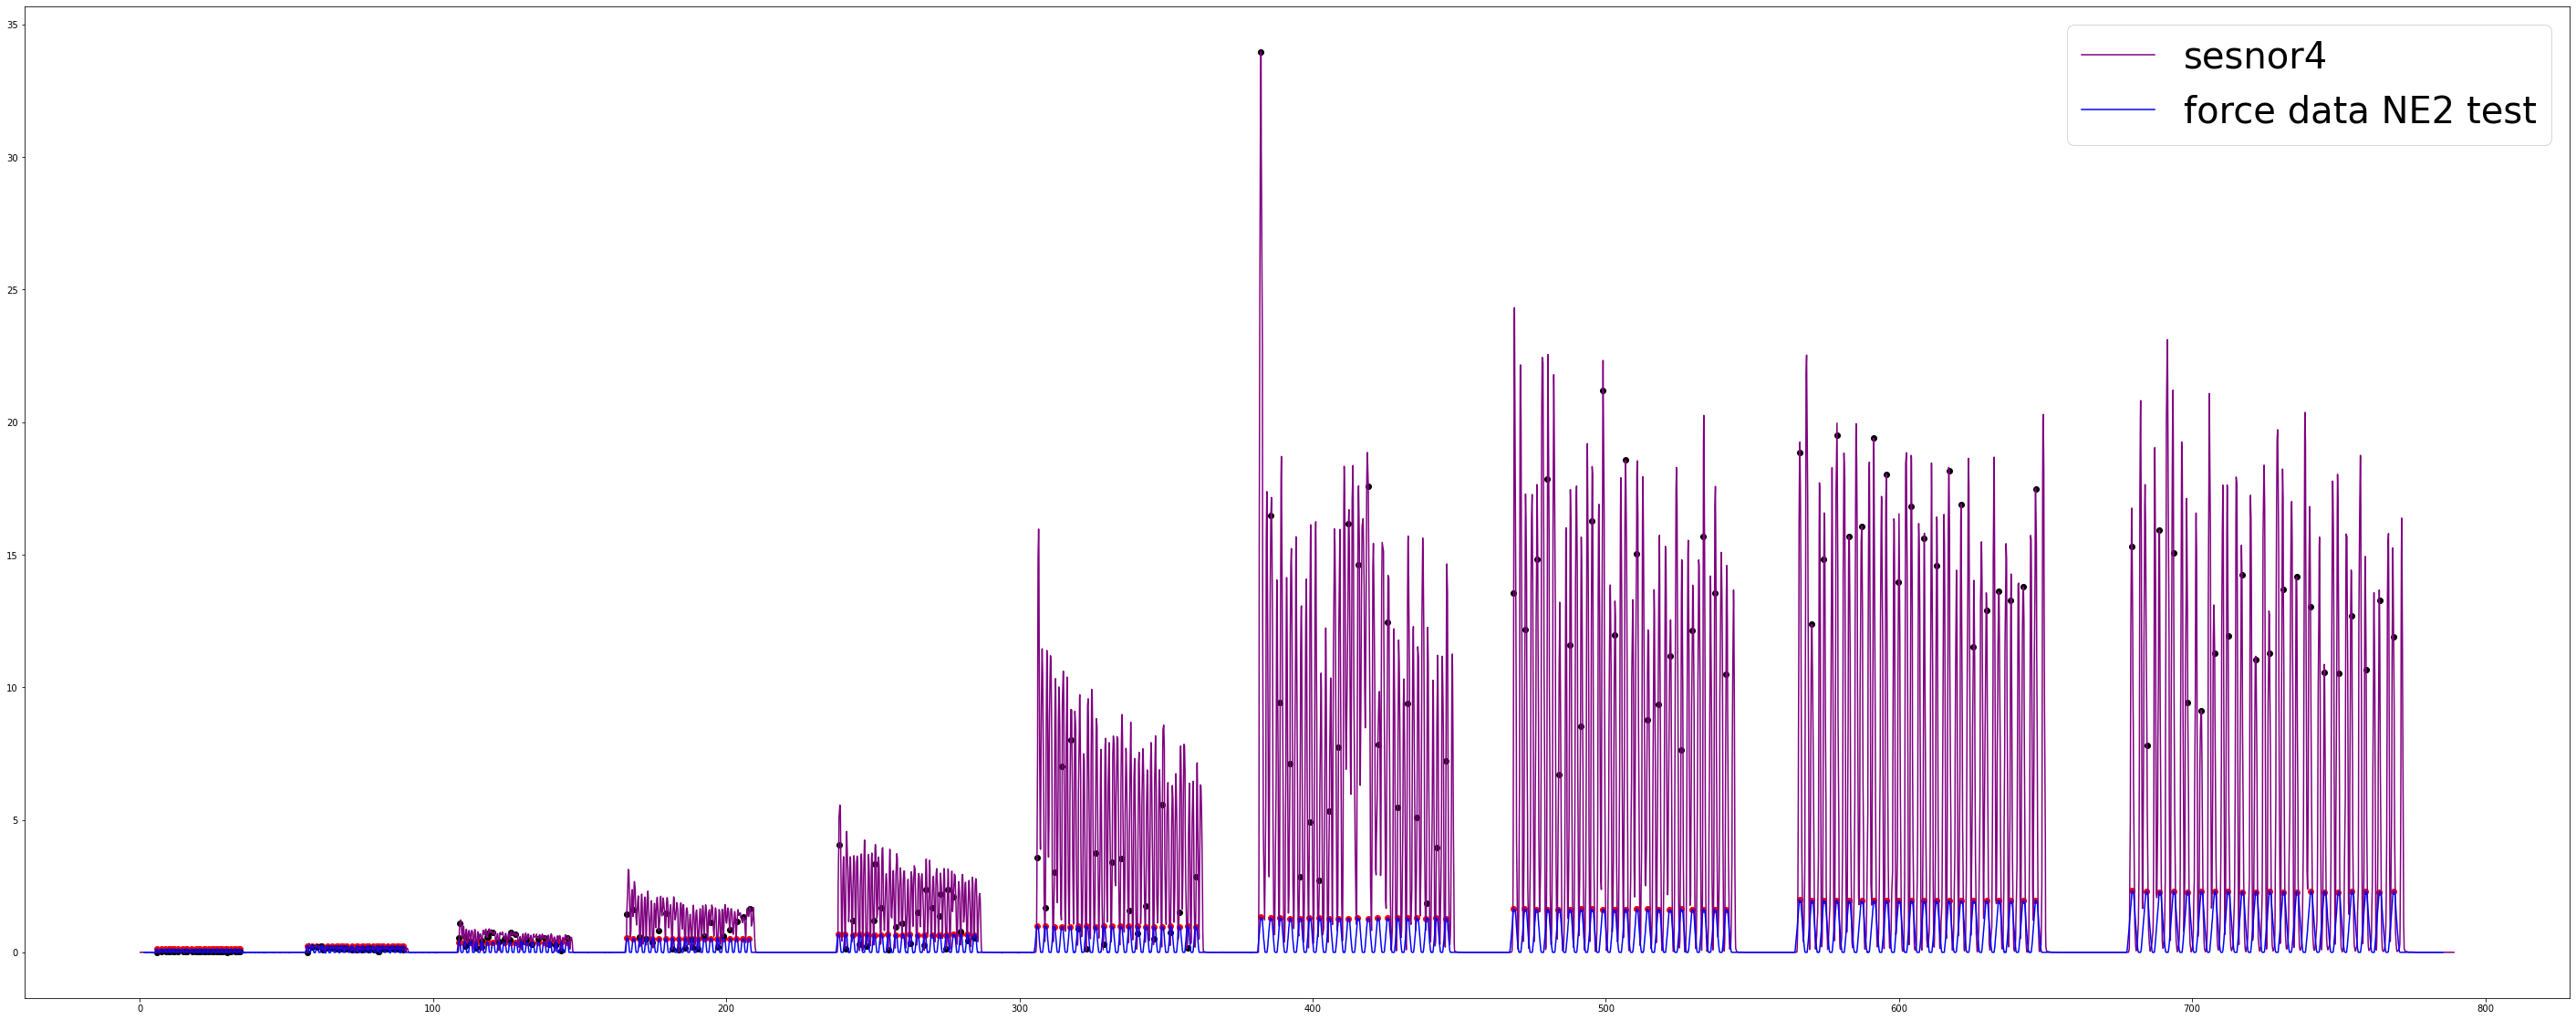

In [85]:
#visualizing the resistance data for each sensor NE 1- 5 - NE2

plt.figure(figsize=(50, 20))

# plt.plot(NE2["Unnamed: 0"],NE2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NE2["Unnamed: 0"],NE2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NE2["Unnamed: 0"],NE2["s3_d"], color = 'blue', label = 'sesnor3')

#Scaling and shifting the x-axises to align/sync the data
scaled_x_force_NE2 = x_force_NE2 + 1.5
scaled_NE2 = NE2["Unnamed: 0"]

plt.plot(scaled_NE2,NE2["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NE2,Load_NE2,color = 'blue', label = 'force data NE2 test' )

plt.legend(fontsize=40)
print("Sensor 4 is more profound for NE2")

#finding the peaks
import bisect
pidx_Load_NE2, _ = find_peaks(Load_NE2,prominence= 0.11 )
peaks_Load_NE2 = Load_NE2[pidx_Load_NE2]
peaks_Ltime_NE2 = scaled_x_force_NE2[pidx_Load_NE2]

plt.scatter(peaks_Ltime_NE2,peaks_Load_NE2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NE2time = []

peaks_Ltime_NE2.reset_index(drop = True, inplace = True)
peaks_Load_NE2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NE2)):
    idx_NE2time.append(bisect.bisect_left(NE2["Unnamed: 0"], peaks_Ltime_NE2[i]))

plt.scatter(NE2["Unnamed: 0"][idx_NE2time],NE2["s4_d"][idx_NE2time],color = 'black')


In [87]:
#Storing the peaks into csv file - NE2
Load_NE2peaks =[]

for i in range(len(peaks_Load_NE2)):
    Load_NE2peaks.append(peaks_Load_NE2[i])
    
content_NE2 = {'R1':NE2["s1_d"][idx_NE2time],
              'R2':NE2["s2_d"][idx_NE2time],
              'R3':NE2["s3_d"][idx_NE2time],
              'R4':NE2["s4_d"][idx_NE2time], 
              'Load': Load_NE2peaks} 

df_NE2 = pd.DataFrame(content_NE2, columns = ['R1','R2','R3','R4','Load'])

df_NE2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NE2.csv',index = False, header = True)

Sensors 3 is better in later times (high f) but 4 is better in lower times (low f)?? for NE3


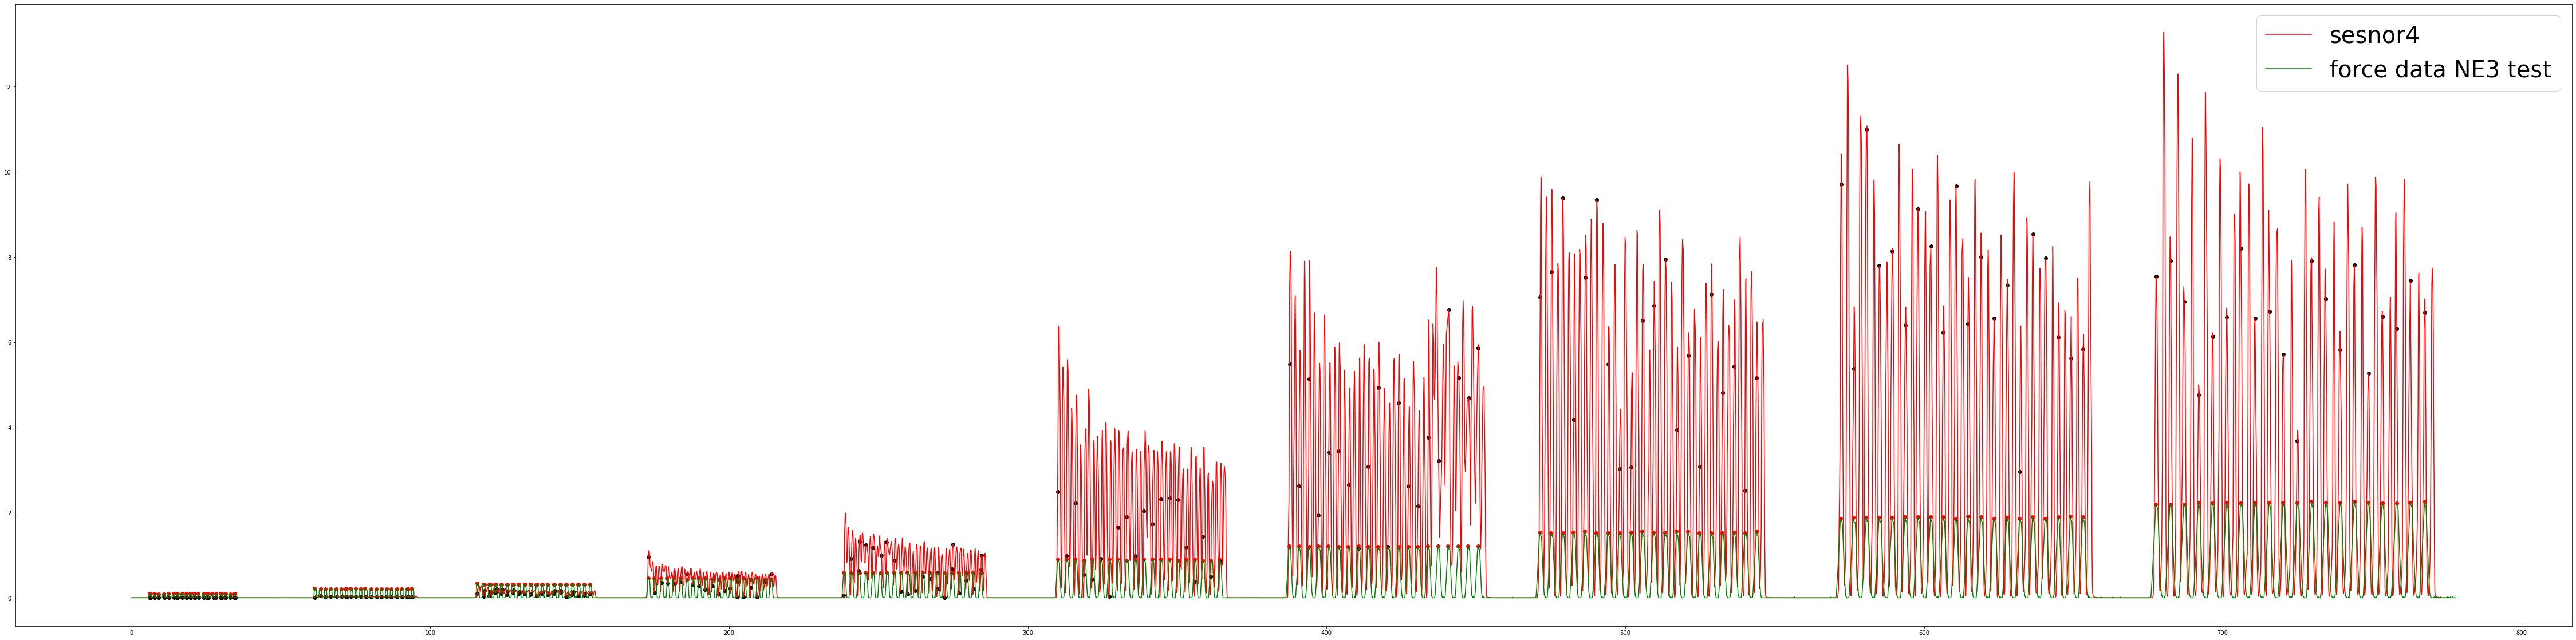

In [88]:
#visualizing the resistance data for each sensor NE 1- 5 - NE3

plt.figure(figsize=(80, 20))

# plt.plot(NE3["Unnamed: 0"],NE3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NE3["Unnamed: 0"],NE3["s2_d"], color = 'red', label = 'sesnor2')

#Scaling and shifting the x-axises to align/sync the data
scaled_x_force_NE3 = x_force_NE3 
scaled_NE3 = NE3["Unnamed: 0"] 

#plt.plot(scaled_NE3,NE3["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(scaled_NE3,NE3["s4_d"], color = 'red', label = 'sesnor4')
plt.plot(scaled_x_force_NE3,Load_NE3,color = 'green', label = 'force data NE3 test')

plt.legend(fontsize=40)

print("Sensors 3 is better in later times (high f) but 4 is better in lower times (low f)?? for NE3")

#finding the peaks

pidx_Load_NE3, _ = find_peaks(Load_NE3,prominence= 0.05 )
peaks_Load_NE3 = Load_NE3[pidx_Load_NE3]
peaks_Ltime_NE3 = scaled_x_force_NE3[pidx_Load_NE3]

plt.scatter(peaks_Ltime_NE3,peaks_Load_NE3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NE3time = []

peaks_Ltime_NE3.reset_index(drop = True, inplace = True)
peaks_Load_NE3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NE3)):
    idx_NE3time.append(bisect.bisect_left(NE3["Unnamed: 0"], peaks_Ltime_NE3[i]))

plt.scatter(NE3["Unnamed: 0"][idx_NE3time],NE3["s4_d"][idx_NE3time],color = 'black')

In [89]:
#Storing the peaks into csv file - NE3
Load_NE3peaks =[]

for i in range(len(peaks_Load_NE3)):
    Load_NE3peaks.append(peaks_Load_NE3[i])
    
content_NE3 = {'R1':NE3["s1_d"][idx_NE3time],
              'R2':NE3["s2_d"][idx_NE3time],
              'R3':NE3["s3_d"][idx_NE3time],
              'R4':NE3["s4_d"][idx_NE3time], 
              'Load': Load_NE3peaks} 

df_NE3 = pd.DataFrame(content_NE3, columns = ['R1','R2','R3','R4','Load'])

df_NE3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NE3.csv',index = False, header = True)

Sensor 3 and 4 are more profound for NE4


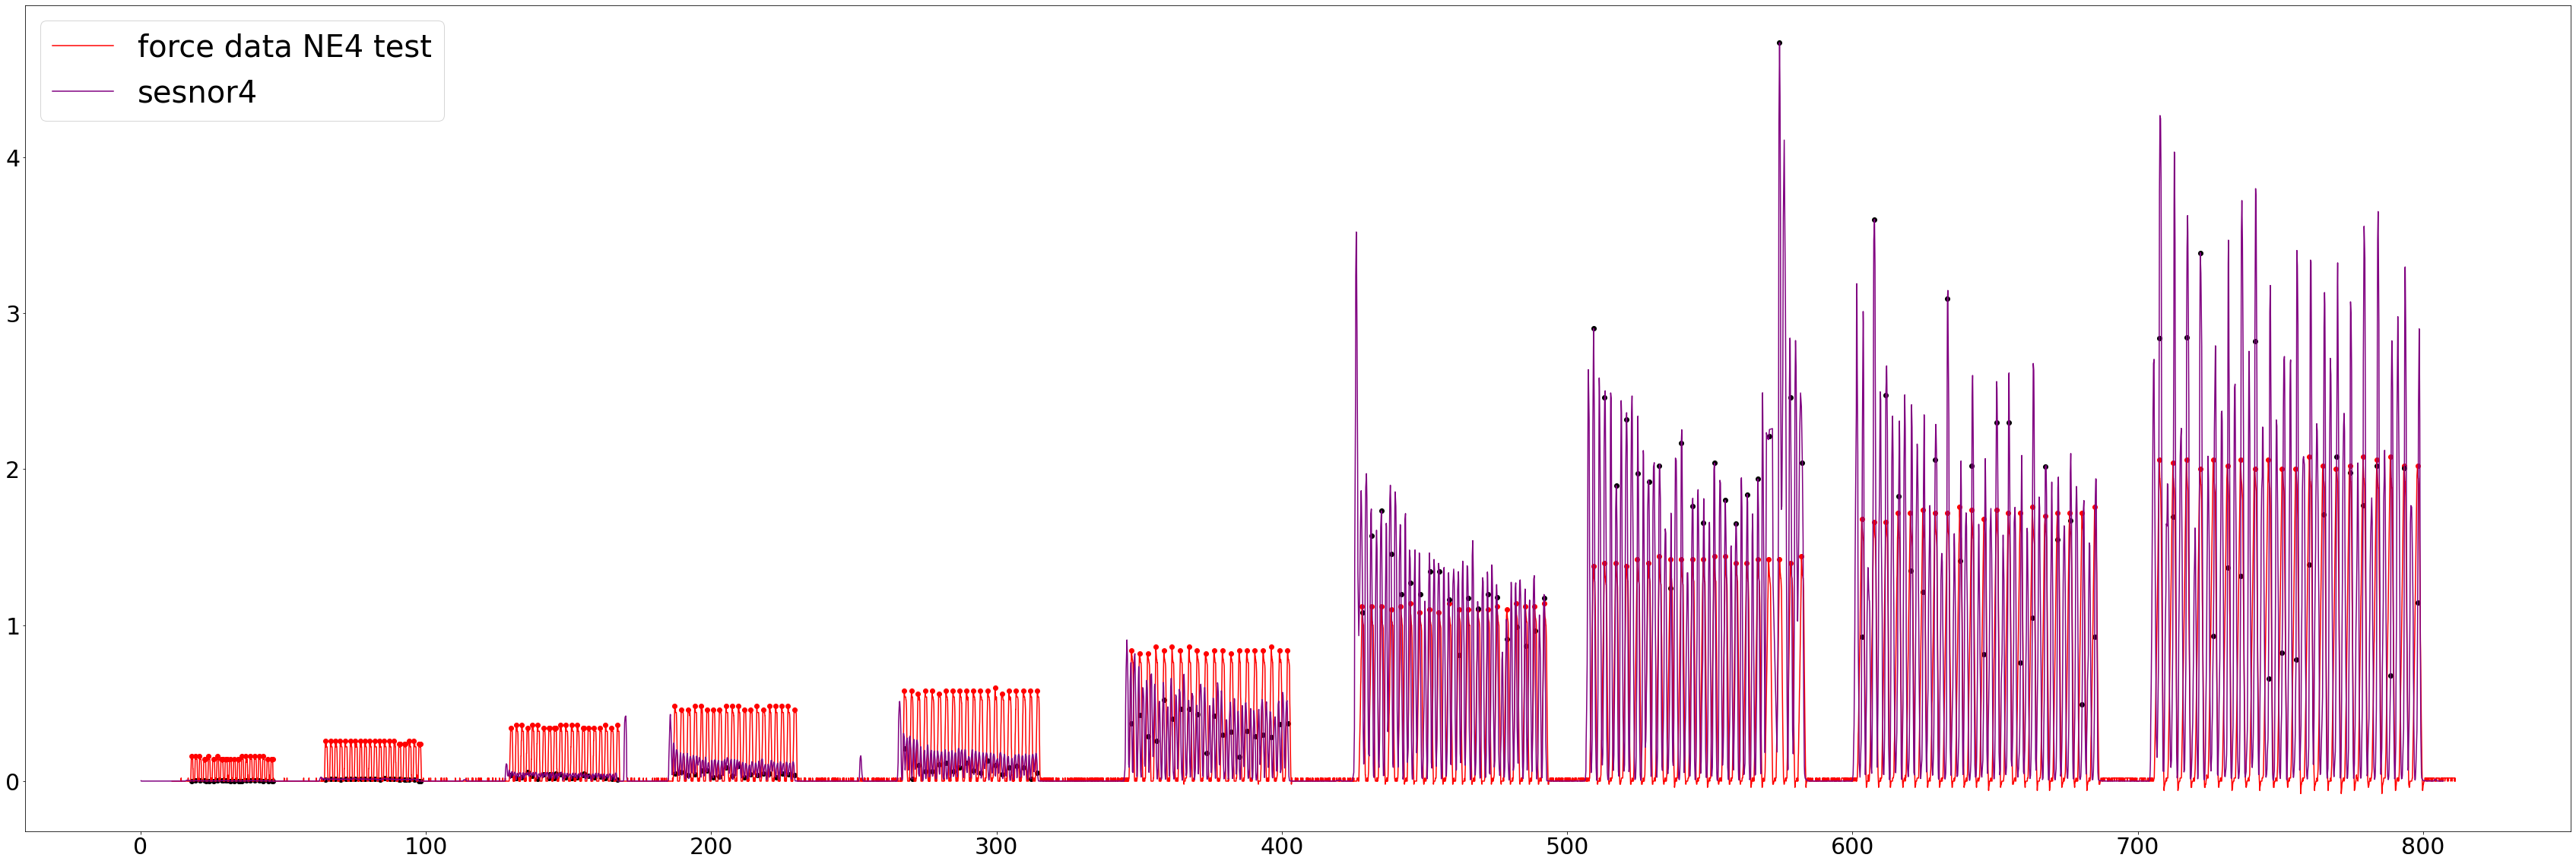

In [24]:
#visualizing the resistance data for each sensor NE 1- 5 - NE4

plt.figure(figsize=(60, 20))

# plt.plot(NE4["Unnamed: 0"],NE4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NE4["Unnamed: 0"],NE4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NE4["Unnamed: 0"],NE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NE4["Unnamed: 0"],NE4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NE4 = x_force_NE4 + 11
scaled_NE4 = NE4["Unnamed: 0"]

plt.plot(scaled_x_force_NE4,Load_NE4,color = 'red', label = 'force data NE4 test' )
# plt.plot(scaled_NE4,NE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(scaled_NE4,NE4["s4_d"], color = 'purple', label = 'sesnor4')
plt.legend(fontsize=40)

print("Sensor 3 and 4 are more profound for NE4")

#finding the peaks

pidx_Load_NE4, _ = find_peaks(Load_NE4,prominence= 0.1 )
peaks_Load_NE4 = Load_NE4[pidx_Load_NE4]
peaks_Ltime_NE4 = scaled_x_force_NE4[pidx_Load_NE4]

plt.scatter(peaks_Ltime_NE4,peaks_Load_NE4,color = 'red')

# # df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
# idx_NE4time = []

# peaks_Ltime_NE4.reset_index(drop = True, inplace = True)
# peaks_Load_NE4.reset_index(drop = True, inplace = True)

# for i in range(len(peaks_Ltime_NE4)):
#     idx_NE4time.append(bisect.bisect_left(NE4["Unnamed: 0"], peaks_Ltime_NE4[i]))

# plt.scatter(NE4["Unnamed: 0"][idx_NE4time],NE4["s4_d"][idx_NE4time],color = 'black')

In [91]:
#Storing the peaks into csv file - NE4
Load_NE4peaks =[]

for i in range(len(peaks_Load_NE4)):
    Load_NE4peaks.append(peaks_Load_NE4[i])
    
content_NE4 = {'R1':NE4["s1_d"][idx_NE4time],
              'R2':NE4["s2_d"][idx_NE4time],
              'R3':NE4["s3_d"][idx_NE4time],
              'R4':NE4["s4_d"][idx_NE4time], 
              'Load': Load_NE4peaks} 

df_NE4 = pd.DataFrame(content_NE4, columns = ['R1','R2','R3','R4','Load'])

df_NE4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NE4.csv',index = False, header = True)

Sensor 4 is more profound ecept in the last interval in which sensor 3 has higher peaks for NE5


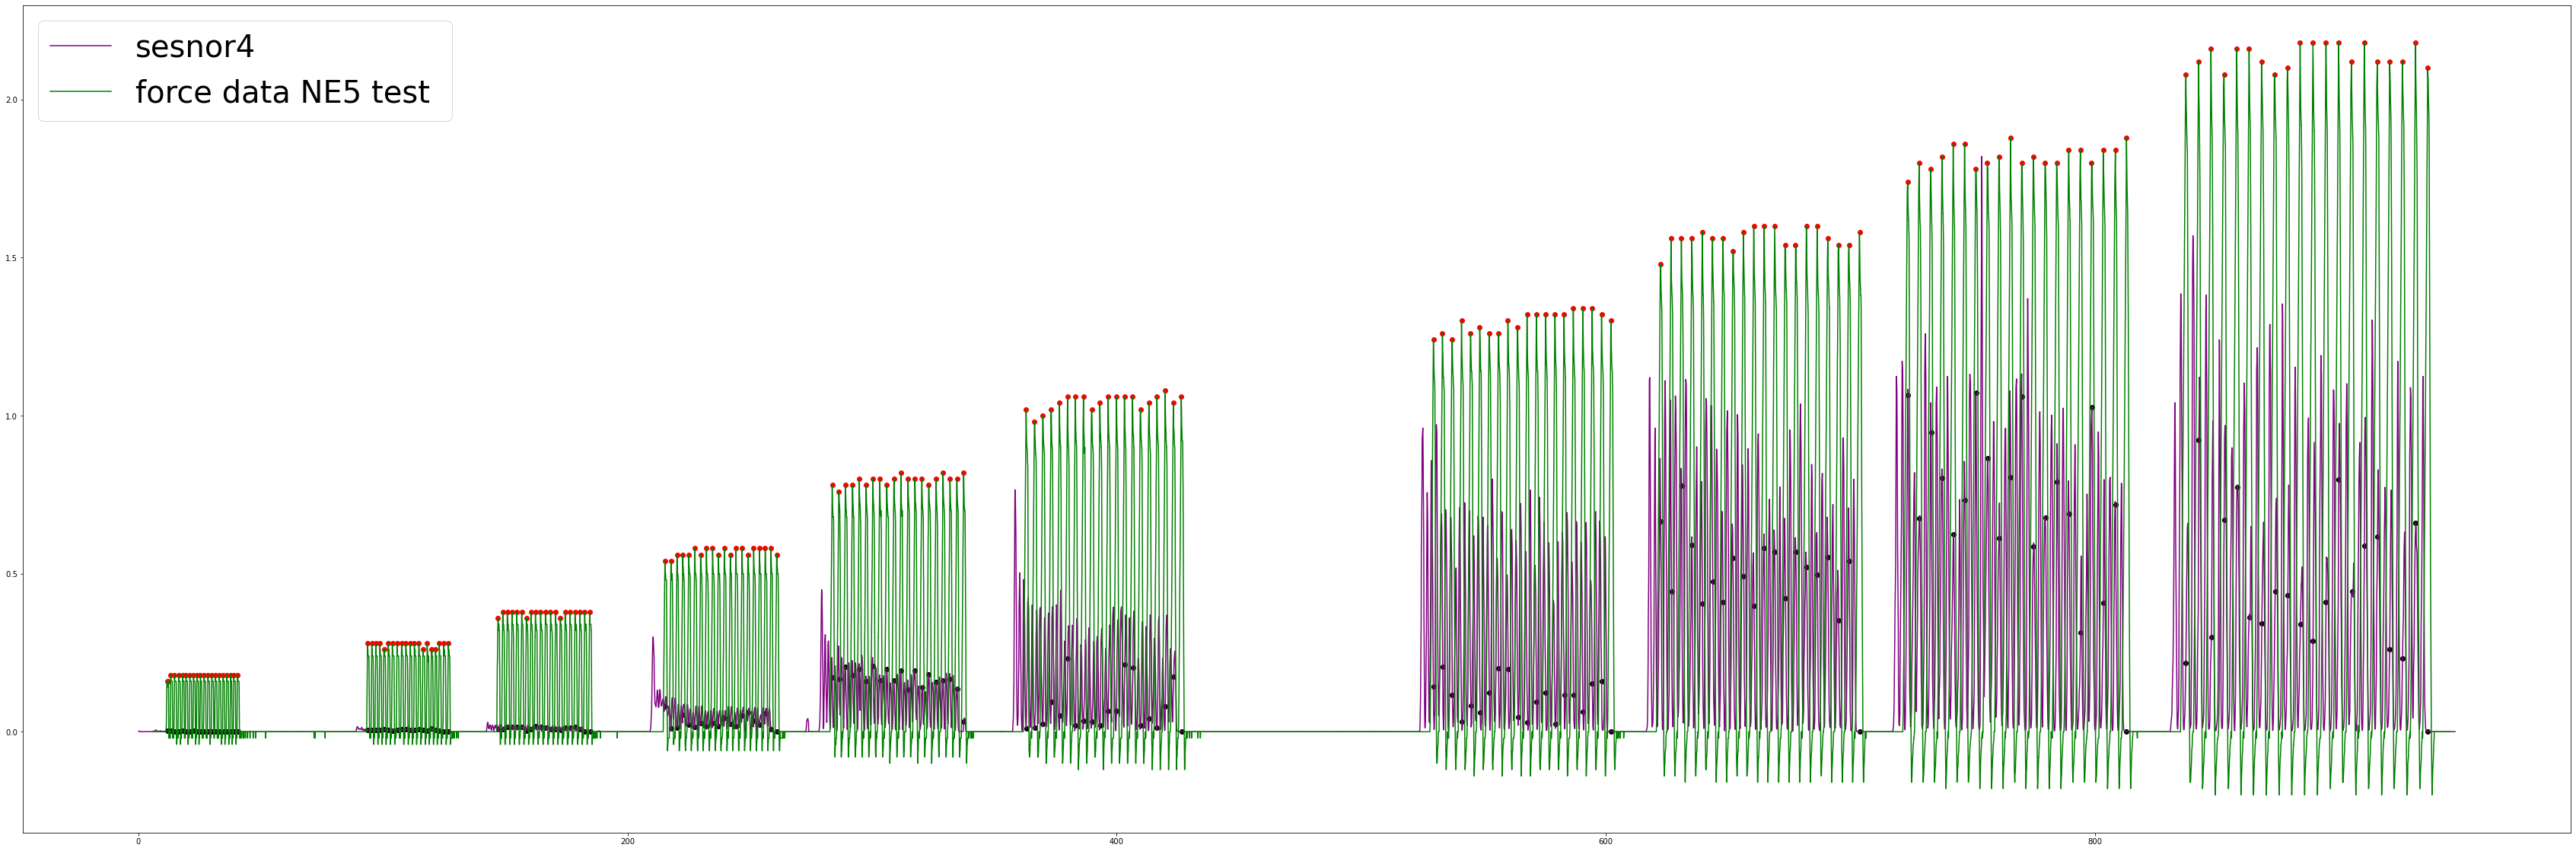

In [92]:
#visualizing the resistance data for each sensor NE 1- 5 - NE5

plt.figure(figsize=(60, 20))

# plt.plot(NE5["Unnamed: 0"],NE5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NE5["Unnamed: 0"],NE5["s2_d"], color = 'red', label = 'sesnor2')

scaled_x_force_NE5 = x_force_NE5 + 5.5
scaled_NE5 = NE5["Unnamed: 0"]

# plt.plot(scaled_NE5,NE5["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(scaled_NE5,NE5["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NE5,Load_NE5,color = 'green', label = 'force data NE5 test ' )

plt.legend(fontsize=40)
print("Sensor 4 is more profound ecept in the last interval in which sensor 3 has higher peaks for NE5")

#finding the peaks

pidx_Load_NE5, _ = find_peaks(Load_NE5,prominence= 0.1 )
peaks_Load_NE5 = Load_NE5[pidx_Load_NE5]
peaks_Ltime_NE5 = scaled_x_force_NE5[pidx_Load_NE5]

plt.scatter(peaks_Ltime_NE5,peaks_Load_NE5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NE5time = []

peaks_Ltime_NE5.reset_index(drop = True, inplace = True)
peaks_Load_NE5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NE5)):
    idx_NE5time.append(bisect.bisect_left(NE5["Unnamed: 0"], peaks_Ltime_NE5[i]))

plt.scatter(NE5["Unnamed: 0"][idx_NE5time],NE5["s4_d"][idx_NE5time],color = 'black')

In [93]:
#Storing the peaks into csv file - NE5
Load_NE5peaks =[]

for i in range(len(peaks_Load_NE5)):
    Load_NE5peaks.append(peaks_Load_NE5[i])
    
content_NE5 = {'R1':NE5["s1_d"][idx_NE5time],
              'R2':NE5["s2_d"][idx_NE5time],
              'R3':NE5["s3_d"][idx_NE5time],
              'R4':NE5["s4_d"][idx_NE5time], 
              'Load': Load_NE5peaks} 

df_NE5 = pd.DataFrame(content_NE5, columns = ['R1','R2','R3','R4','Load'])

df_NE5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NE5.csv',index = False, header = True)